In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
import seaborn as sb
import numpy as np

In [49]:
data = pd.read_csv("dataset.csv")
df = pd.DataFrame(data)
# df
# df.head()
df.shape

(162634, 103)

In [50]:
df

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923,13792,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544,13792,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475,13792,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579,13792,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510,13792,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,13153,3.029751,1,-7.108630,-5.142668,7.561579,2307,14976,-472.1,-159.9,...,0.071060,48.480202,0.011479,0.145746,0.002764,0.231577,81.0,84.0,48.0,18.0
162630,13153,2.799253,1,-7.070070,-5.137869,7.471857,2254,14976,-469.7,-163.3,...,0.063959,48.565132,0.009935,0.145729,0.002678,0.231583,78.0,84.0,49.0,19.0
162631,13153,2.385399,1,-7.066209,-5.137034,7.463470,2259,14976,-469.3,-158.8,...,0.059657,48.547317,0.009491,0.145745,0.002632,0.231582,78.0,84.0,49.0,19.0
162632,13153,2.043339,1,-7.028307,-5.131297,7.378397,2257,14976,-465.2,-160.3,...,0.039351,48.540602,0.002612,0.145734,0.002631,0.231583,78.0,84.0,49.0,19.0


In [51]:
for col in df.columns:
    print(col)

event_id
time_to_tca
mission_id
risk
max_risk_estimate
max_risk_scaling
miss_distance
relative_speed
relative_position_r
relative_position_t
relative_position_n
relative_velocity_r
relative_velocity_t
relative_velocity_n
t_time_lastob_start
t_time_lastob_end
t_recommended_od_span
t_actual_od_span
t_obs_available
t_obs_used
t_residuals_accepted
t_weighted_rms
t_rcs_estimate
t_cd_area_over_mass
t_cr_area_over_mass
t_sedr
t_j2k_sma
t_j2k_ecc
t_j2k_inc
t_ct_r
t_cn_r
t_cn_t
t_crdot_r
t_crdot_t
t_crdot_n
t_ctdot_r
t_ctdot_t
t_ctdot_n
t_ctdot_rdot
t_cndot_r
t_cndot_t
t_cndot_n
t_cndot_rdot
t_cndot_tdot
c_object_type
c_time_lastob_start
c_time_lastob_end
c_recommended_od_span
c_actual_od_span
c_obs_available
c_obs_used
c_residuals_accepted
c_weighted_rms
c_rcs_estimate
c_cd_area_over_mass
c_cr_area_over_mass
c_sedr
c_j2k_sma
c_j2k_ecc
c_j2k_inc
c_ct_r
c_cn_r
c_cn_t
c_crdot_r
c_crdot_t
c_crdot_n
c_ctdot_r
c_ctdot_t
c_ctdot_n
c_ctdot_rdot
c_cndot_r
c_cndot_t
c_cndot_n
c_cndot_rdot
c_cndot_tdot
t

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162634 entries, 0 to 162633
Columns: 103 entries, event_id to AP
dtypes: float64(94), int64(8), object(1)
memory usage: 127.8+ MB


In [53]:
# for l in df:
#     if df.dtypes==object:
# #         print(l)
# print(dict(df.dtypes))
# for i in dict(df.dtypes):
#     if  =="dtype('object')":
#         print(i)
# print(dict(df.dtypes))
print(list(df.select_dtypes('object')))

['c_object_type']


In this challenge, you are tasked to build a model to predict the final collision risk estimate between a given satellite and a space object (e.g. another satellite, space debris, etc).

In [54]:
df.risk

0        -10.204955
1        -10.355758
2        -10.345631
3        -10.337809
4        -10.391260
            ...    
162629    -7.108630
162630    -7.070070
162631    -7.066209
162632    -7.028307
162633    -7.172372
Name: risk, Length: 162634, dtype: float64

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["c_object_type"] = label_encoder.fit_transform(df["c_object_type"])
df["c_object_type"] 
print(df["c_object_type"].head(103))

0      4
1      4
2      4
3      4
4      4
      ..
98     0
99     0
100    0
101    0
102    0
Name: c_object_type, Length: 103, dtype: int32


In [56]:
# # print(df.isna().sum())
# # df1 = df.interpolate()
# # print(df1.isna().sum())

# df1 = df.interpolate(limit_direction='both')
# # df1 = df1.drop(['risk'],axis=1)
# # df1 = df1.drop(['c_object_type'],axis=1)
# # df1 = df1.drop(['t_position_covariance_det'],axis=1)
# # df1 = df1.drop(['c_position_covariance_det'],axis=1)
# # X = df1
# # y = df["risk"]
# # print(X.isna().sum())
# # print(np.any(np.isnan(X)))
# # print(np.all(np.isfinite(X)))
# numeric_lst = ['int64','float64']
# numeric_cols = list(df.select_dtypes(include=numeric_lst).columns)


In [57]:
# numeric_cols

In [58]:
# df_copy = df[numeric_cols]
# df_copy

In [59]:
X = df.drop(labels=['risk'],axis=1)
y = df['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [60]:
X_train

,event_id,time_to_tca,mission_id,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
87601,7090,2.557333,5,-6.670195,3.542322e+01,7707,15018,116.2,835.1,7661.1,...,0.079379,9.894241,0.004376,0.058701,0.003115,0.244284,68.0,72.0,0.0,8.0
121753,9848,4.294982,19,-7.214955,4.195626e+01,34301,10969,-76.6,-23308.8,-25164.7,...,0.108878,5.800115,0.003009,0.061811,0.007406,0.216862,100.0,87.0,59.0,8.0
48454,3936,5.465731,3,-5.140321,2.358745e+00,12278,6492,-1.8,-11054.1,5345.7,...,0.139734,6.748518,0.012271,0.014090,0.009267,0.023690,70.0,71.0,13.0,2.0
73922,5951,5.796628,2,-6.571379,3.837592e+00,24090,10292,-993.7,17437.1,16593.2,...,0.172125,23.278456,0.008233,0.561018,0.003460,0.911688,74.0,77.0,17.0,5.0
148484,12012,5.569676,6,-7.691009,6.860000e-08,23624,14951,-990.0,5068.1,23053.7,...,1.545672,79053.661500,0.005787,79053.661500,0.002775,79053.661500,68.0,71.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,6638,0.674566,19,-7.048517,5.425221e+01,10927,12569,-467.8,6066.5,-9076.4,...,0.033515,2.705191,0.005202,0.084989,0.007850,0.116095,70.0,69.0,0.0,2.0
65615,5276,6.364197,1,-5.203912,2.382070e+01,5619,14633,-251.4,1267.5,5469.1,...,0.396941,25.674709,0.003230,0.043932,0.004449,0.046188,68.0,70.0,0.0,4.0
77655,6258,5.591672,5,-7.763715,1.617705e+01,10931,1018,496.4,10909.8,-486.7,...,0.344926,18.074997,0.007855,0.092418,0.004099,0.237577,68.0,71.0,0.0,3.0
56088,4531,1.510020,5,-7.071041,1.813676e+02,879,12874,675.0,-314.8,-467.8,...,0.052959,1.554494,0.005326,0.034235,0.004139,0.172042,119.0,108.0,103.0,10.0


In [61]:
y_train

87601    -20.075617
121753   -23.377786
48454     -5.358328
73922     -7.220187
148484   -14.418050
            ...    
82270    -28.443939
65615    -13.417482
77655    -13.145087
56088    -30.000000
38408    -30.000000
Name: risk, Length: 97580, dtype: float64

In [62]:
print(X_train.isnull().sum())

event_id                0
time_to_tca             0
mission_id              0
max_risk_estimate       0
max_risk_scaling        0
                     ... 
c_sigma_ndot         5485
F10                  4090
F3M                  4090
SSN                  4090
AP                   4090
Length: 102, dtype: int64


In [63]:
print(np.any(np.isnan(X_train)))

True


In [64]:
X_train = X_train.interpolate(limit_direction='both')

In [65]:
print(X_train.isnull().sum())

event_id             0
time_to_tca          0
mission_id           0
max_risk_estimate    0
max_risk_scaling     0
                    ..
c_sigma_ndot         0
F10                  0
F3M                  0
SSN                  0
AP                   0
Length: 102, dtype: int64


In [66]:
print(np.any(np.isnan(X_train)))

False


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# correlation = data.corr()
# plt.figure(figsize=(102,102))
# sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

# plt.title('Correlation between different fearures')

In [68]:
# first 13 features except 'risk'
df_copy = X_train[['event_id', 'time_to_tca', 'mission_id', 'max_risk_estimate', 'max_risk_scaling', 'miss_distance', 'relative_speed', 'relative_position_r', 'relative_position_t', 'relative_position_n', 'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n']]
df_copy

,event_id,time_to_tca,mission_id,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n
87601,7090,2.557333,5,-6.670195,3.542322e+01,7707,15018,116.2,835.1,7661.1,-21.7,-14929.3,1632.0
121753,9848,4.294982,19,-7.214955,4.195626e+01,34301,10969,-76.6,-23308.8,-25164.7,49.5,-8047.2,7454.2
48454,3936,5.465731,3,-5.140321,2.358745e+00,12278,6492,-1.8,-11054.1,5345.7,18.7,-2825.5,-5844.9
73922,5951,5.796628,2,-6.571379,3.837592e+00,24090,10292,-993.7,17437.1,16593.2,69.4,-7093.8,7457.0
148484,12012,5.569676,6,-7.691009,6.860000e-08,23624,14951,-990.0,5068.1,23053.7,-34.2,-14602.7,3209.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,6638,0.674566,19,-7.048517,5.425221e+01,10927,12569,-467.8,6066.5,-9076.4,-18.5,-10448.8,-6985.9
65615,5276,6.364197,1,-5.203912,2.382070e+01,5619,14633,-251.4,1267.5,5469.1,-0.3,-14257.2,3295.4
77655,6258,5.591672,5,-7.763715,1.617705e+01,10931,1018,496.4,10909.8,-486.7,34.8,-46.9,-1017.0
56088,4531,1.510020,5,-7.071041,1.813676e+02,879,12874,675.0,-314.8,-467.8,-298.8,-10871.8,6889.7


<AxesSubplot: >

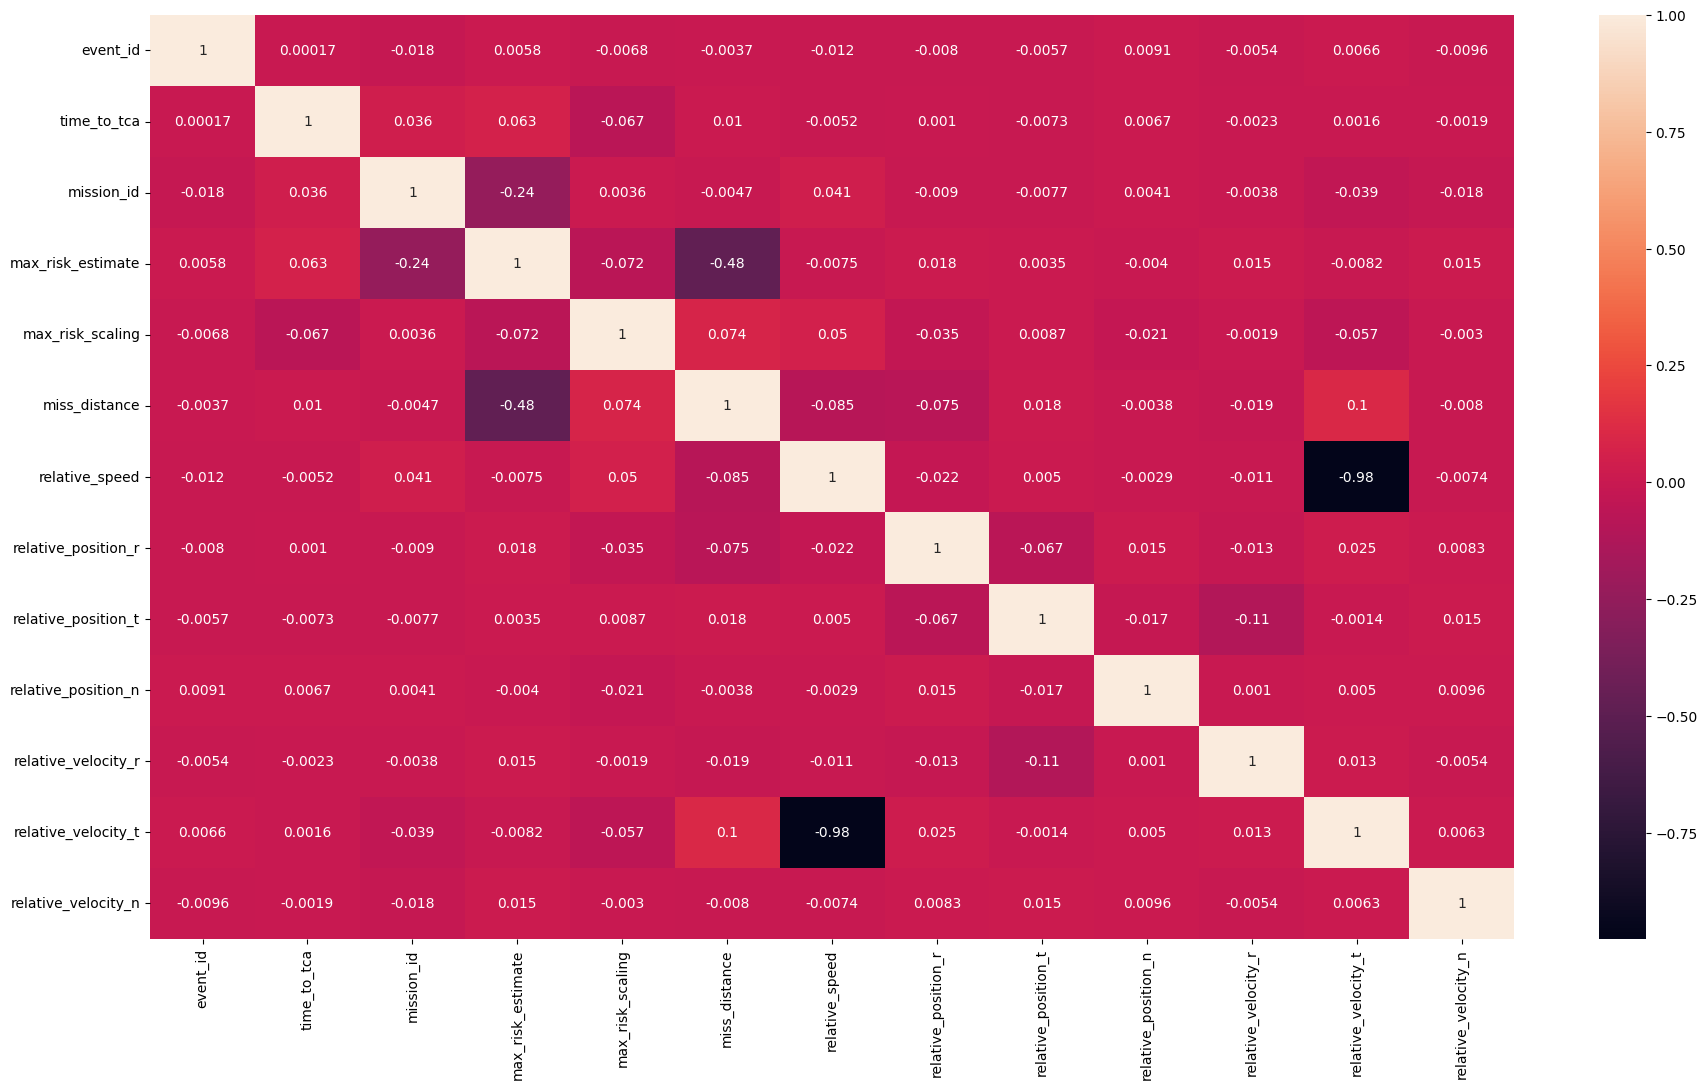

In [69]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy.corr(), annot =True)

<AxesSubplot: title={'center': 'Correlation with risk'}>

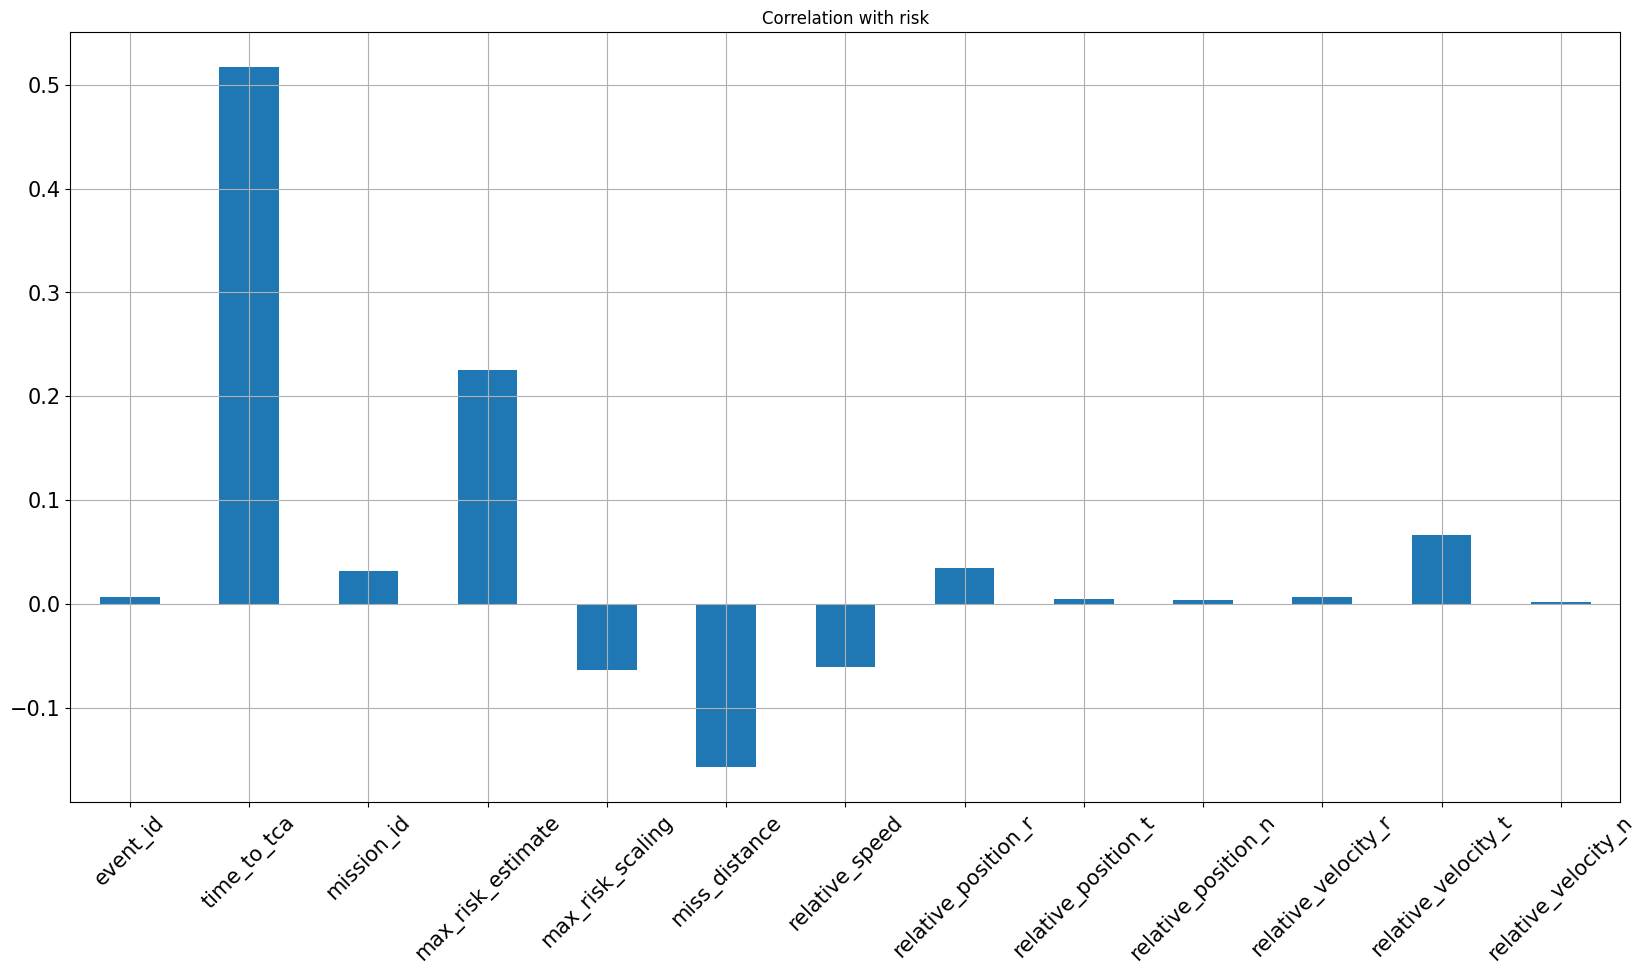

In [70]:
df_copy.corrwith(df.risk).plot.bar(figsize=(20,10),title="Correlation with risk",fontsize=15,rot=45,grid=True)

In [71]:
#Select next 30 features
df_copy1 = X_train[['t_time_lastob_start', 't_time_lastob_end', 't_recommended_od_span', 't_actual_od_span', 't_obs_available', 't_obs_used', 't_residuals_accepted', 't_weighted_rms', 't_rcs_estimate', 't_cd_area_over_mass', 't_cr_area_over_mass', 't_sedr', 't_j2k_sma', 't_j2k_ecc', 't_j2k_inc', 't_ct_r', 't_cn_r', 't_cn_t', 't_crdot_r', 't_crdot_t', 't_crdot_n', 't_ctdot_r', 't_ctdot_t', 't_ctdot_n', 't_ctdot_rdot', 't_cndot_r', 't_cndot_t', 't_cndot_n', 't_cndot_rdot', 't_cndot_tdot']]
df_copy1

,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,...,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot
87601,1,0,4.12,4.11,406,403,96.4,1.418,0.3677,0.015212,...,0.022747,-0.999852,0.128775,-0.134739,-0.137215,-0.037792,0.045488,0.696772,-0.013913,0.039711
121753,1,0,7.16,7.16,261,258,99.7,1.141,0.4460,0.018995,...,-0.010610,-0.996381,-0.081037,-0.185214,0.057614,0.234576,-0.001763,0.323325,0.005174,-0.234593
48454,1,0,6.67,6.67,203,203,98.9,1.118,4.9870,0.017917,...,-0.005768,-0.999961,-0.140544,-0.172653,0.159683,0.113830,-0.033589,0.704583,0.018391,-0.113465
73922,1,0,3.98,3.98,437,437,99.1,1.098,3.4505,0.017179,...,0.044526,-0.999385,0.175278,-0.397813,-0.161289,0.160214,0.023091,-0.129201,-0.024012,-0.161706
148484,1,0,3.96,3.96,695,692,99.3,1.104,2.2564,0.007038,...,0.041871,-0.881420,0.480341,0.008226,-0.480538,-0.048918,-0.073228,0.808971,0.073259,0.007683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,1,0,7.03,7.03,239,238,99.3,1.274,0.4263,0.013039,...,-0.062683,-0.999846,-0.588117,-0.044784,0.503165,0.161120,0.087690,0.168739,-0.091878,-0.161961
65615,1,0,3.63,3.63,483,483,95.5,1.209,4.3346,0.031954,...,0.039853,-0.979480,0.102842,-0.099135,-0.175537,-0.024248,0.064658,0.167373,-0.076300,0.009146
77655,1,0,3.98,3.98,427,426,98.7,1.263,0.3994,0.013651,...,-0.014564,-0.998342,0.122340,-0.529179,-0.107023,0.088927,-0.034686,0.283603,0.034651,-0.087241
56088,1,0,3.71,3.71,511,508,97.3,1.212,0.4172,0.012896,...,-0.055114,-0.999413,-0.105826,0.014346,0.081275,0.348267,0.100369,-0.383086,-0.082603,-0.348668


<AxesSubplot: >

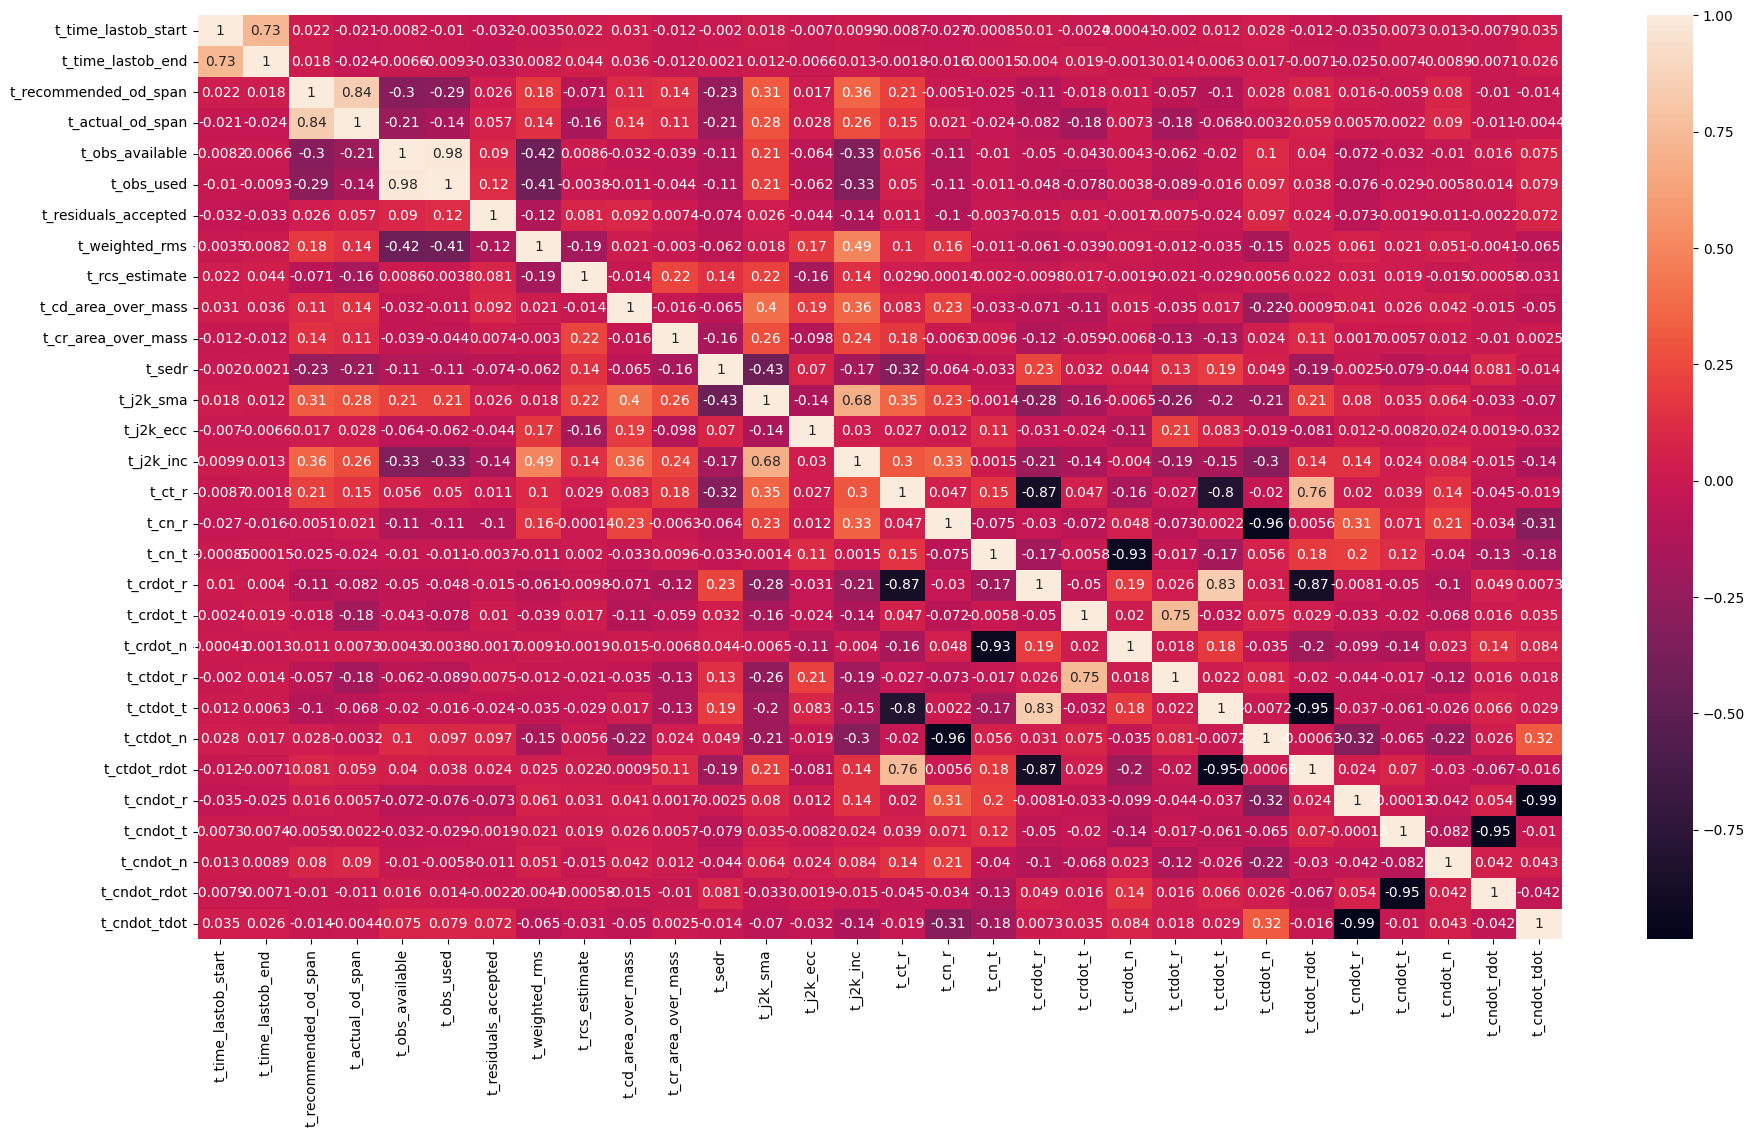

In [72]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy1.corr(), annot =True)

<AxesSubplot: title={'center': 'Correlation with risk'}>

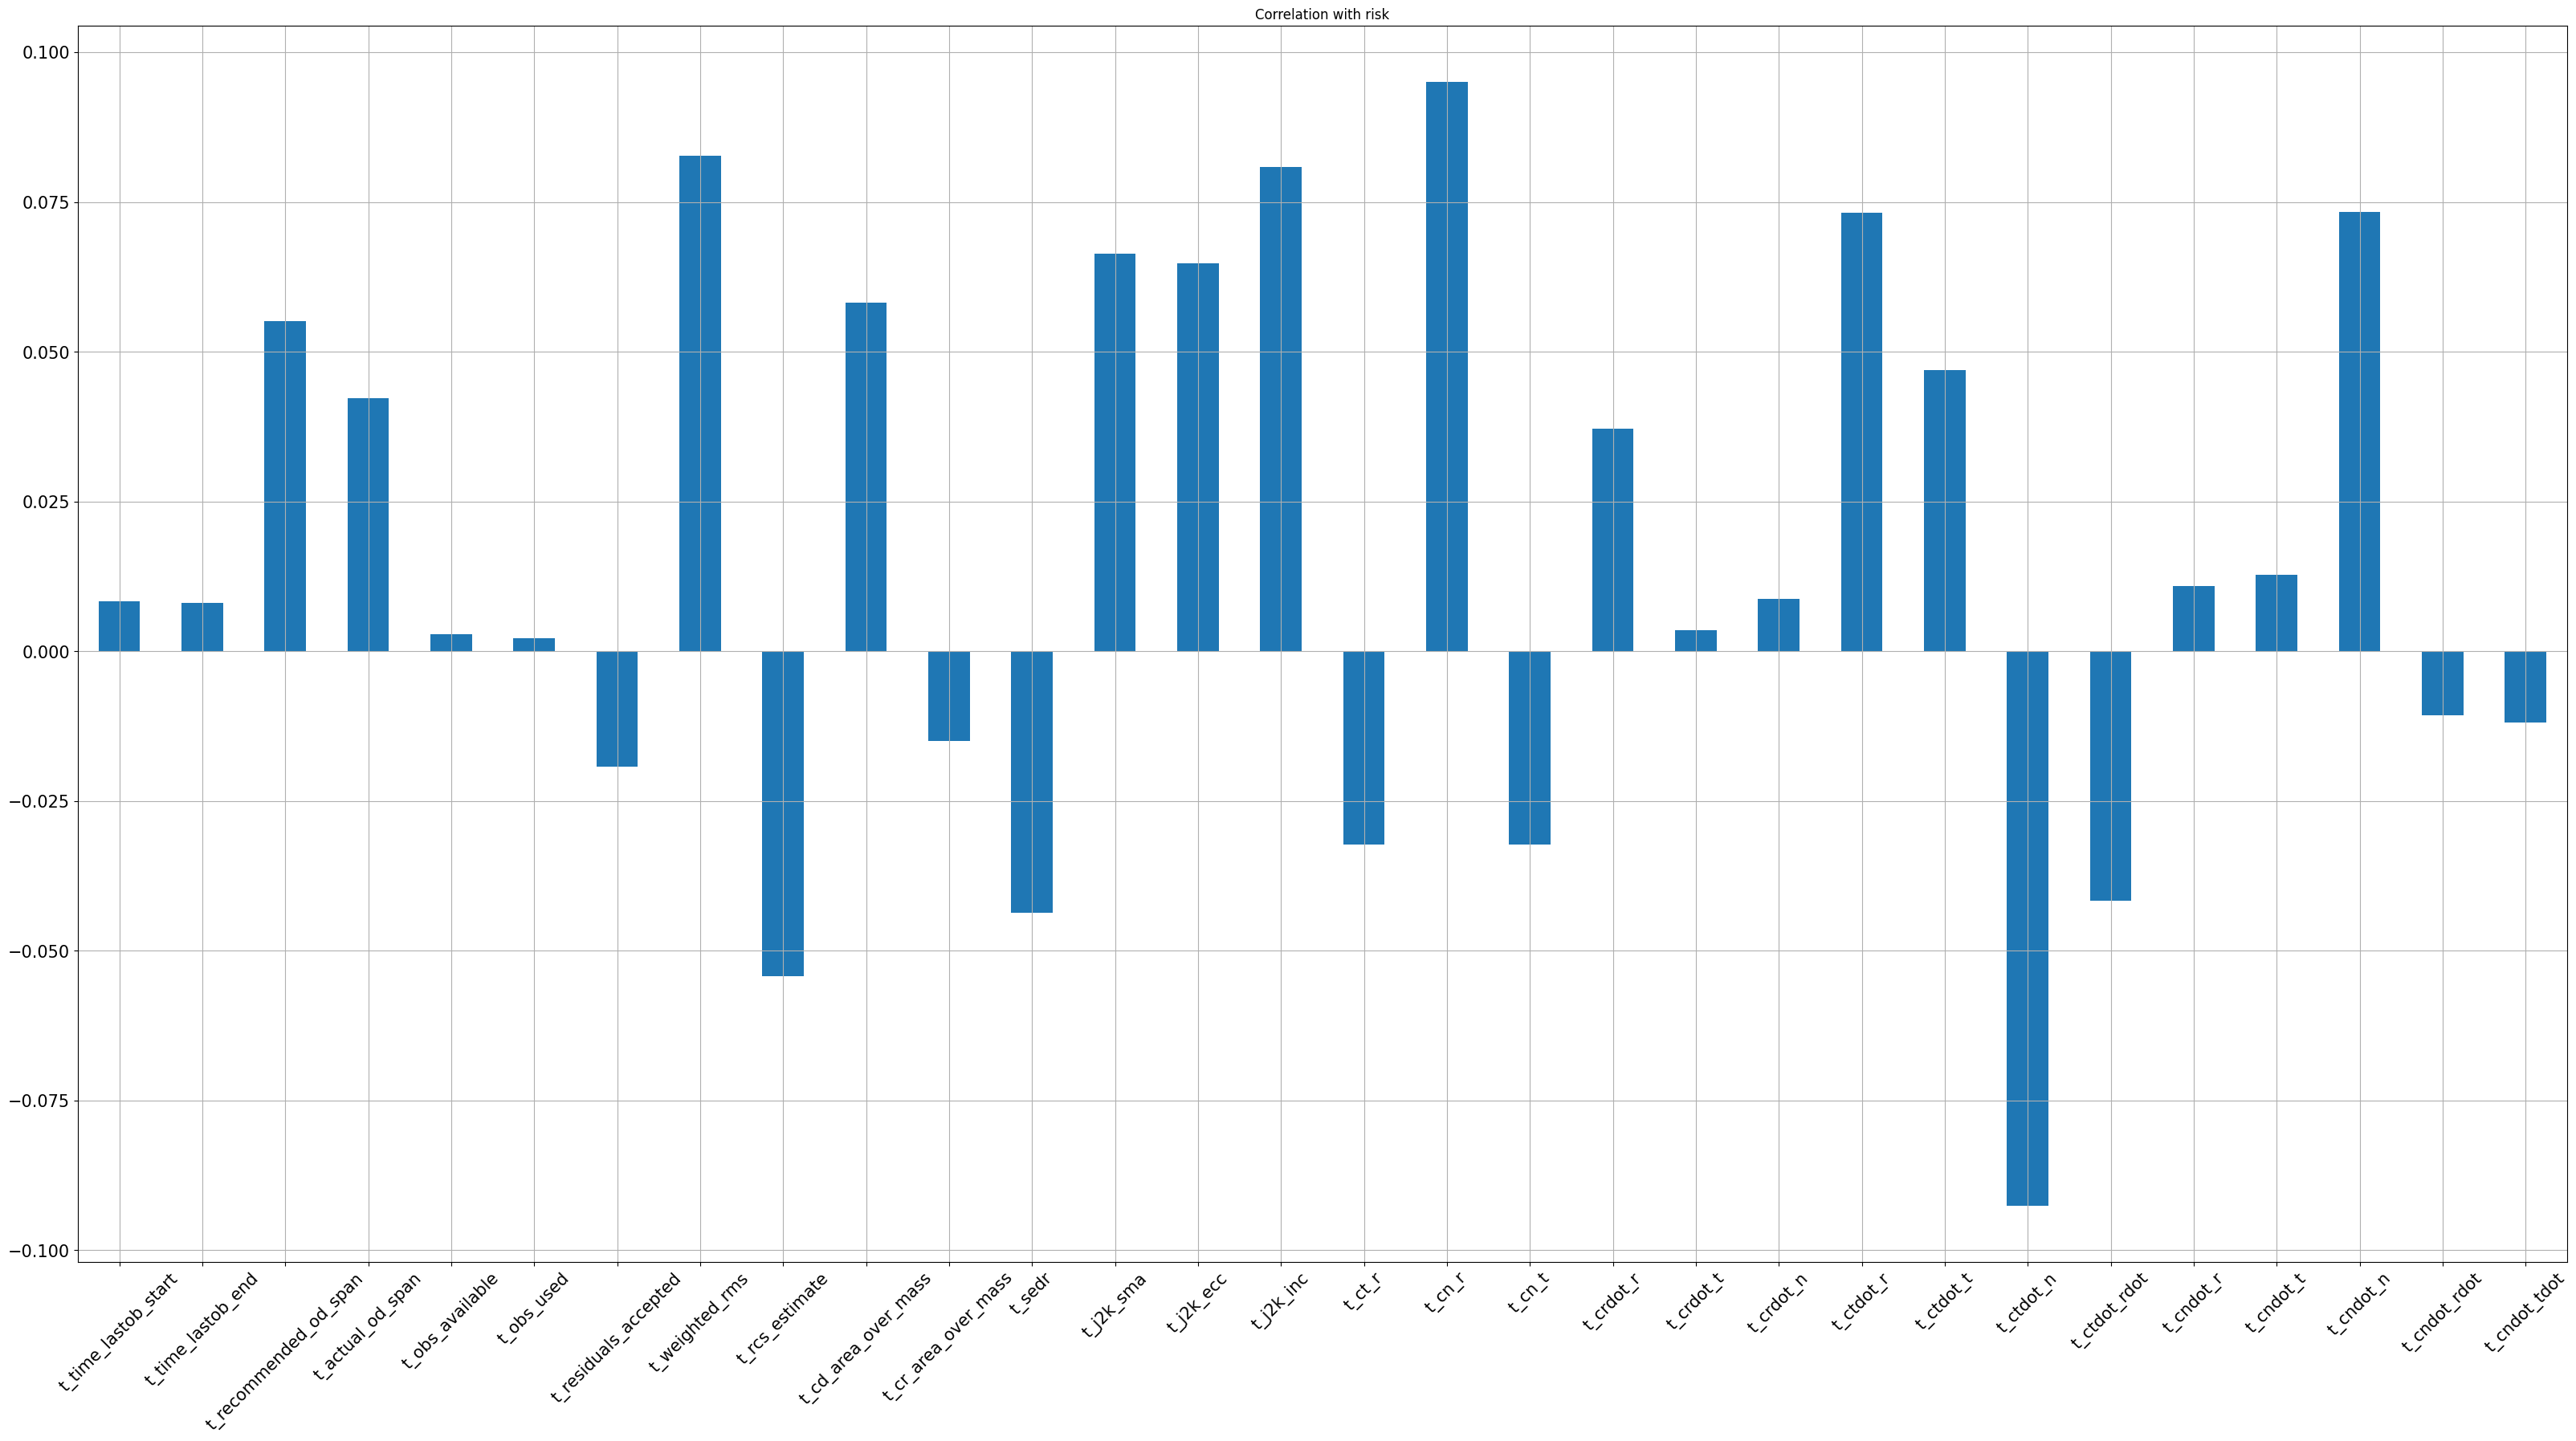

In [73]:
df_copy1.corrwith(df.risk).plot.bar(figsize=(40,20),title="Correlation with risk",fontsize=15,rot=45,grid=True)

In [74]:
#Select next 31 features
df_copy2 = X_train[['c_time_lastob_start', 'c_time_lastob_end', 'c_recommended_od_span', 'c_actual_od_span', 'c_obs_available', 'c_obs_used', 'c_residuals_accepted', 'c_weighted_rms', 'c_rcs_estimate', 'c_cd_area_over_mass', 'c_cr_area_over_mass','c_sedr', 'c_j2k_sma', 'c_j2k_ecc', 'c_j2k_inc', 'c_ct_r', 'c_cn_r', 'c_cn_t', 'c_crdot_r', 'c_crdot_t', 'c_crdot_n', 'c_ctdot_r', 'c_ctdot_t', 'c_ctdot_n', 'c_ctdot_rdot', 'c_cndot_r', 'c_cndot_t', 'c_cndot_n', 'c_cndot_rdot', 'c_cndot_tdot', 't_span']]
df_copy2

,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,...,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span
87601,180.0,2.0,12.29,12.29,24.0,24.0,99.0,2.097,0.0151,0.686042,...,-0.853789,-0.111820,0.674739,0.105543,0.427495,-0.034597,-0.855213,0.041665,-0.448378,1.00
121753,2.0,1.0,14.92,14.92,24.0,24.0,96.9,1.593,0.0151,0.500194,...,-0.990199,0.115252,-0.248748,-0.123298,0.492183,-0.090058,0.872383,0.044749,-0.511004,1.50
48454,2.0,1.0,17.74,17.74,52.0,51.0,94.9,1.304,0.0083,0.700913,...,-0.999703,0.398646,-0.235475,-0.397004,0.440186,0.174811,0.501857,-0.173879,-0.448264,4.12
73922,180.0,2.0,47.59,47.59,15.0,15.0,95.0,2.970,0.0111,0.807123,...,-0.927636,-0.176789,0.005510,0.215564,0.509593,0.117781,-0.057271,-0.132809,-0.542571,12.00
148484,180.0,2.0,68.76,17.84,15.0,9.0,91.7,3.515,0.0122,0.200135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,180.0,2.0,26.42,26.42,21.0,21.0,100.0,2.300,0.0098,1.134304,...,-0.993031,-0.230335,-0.942823,0.207900,0.687639,0.123054,0.568191,-0.115516,-0.691088,1.50
65615,2.0,1.0,11.75,11.75,23.0,23.0,100.0,2.140,0.0104,1.230433,...,-0.981636,0.691300,-0.268311,-0.689158,0.307982,-0.170867,0.696219,0.171661,-0.329855,21.00
77655,180.0,2.0,15.01,15.01,24.0,24.0,99.0,1.798,0.0110,0.522177,...,-0.645358,0.136106,-0.770255,-0.134730,0.569300,-0.040382,0.950890,0.040012,-0.800920,1.00
56088,1.0,0.0,11.14,11.14,24.0,24.0,100.0,2.827,0.0116,0.101716,...,-0.520935,0.054659,0.559212,-0.068028,-0.144623,-0.018195,0.913338,0.010796,0.331256,1.00


<AxesSubplot: >

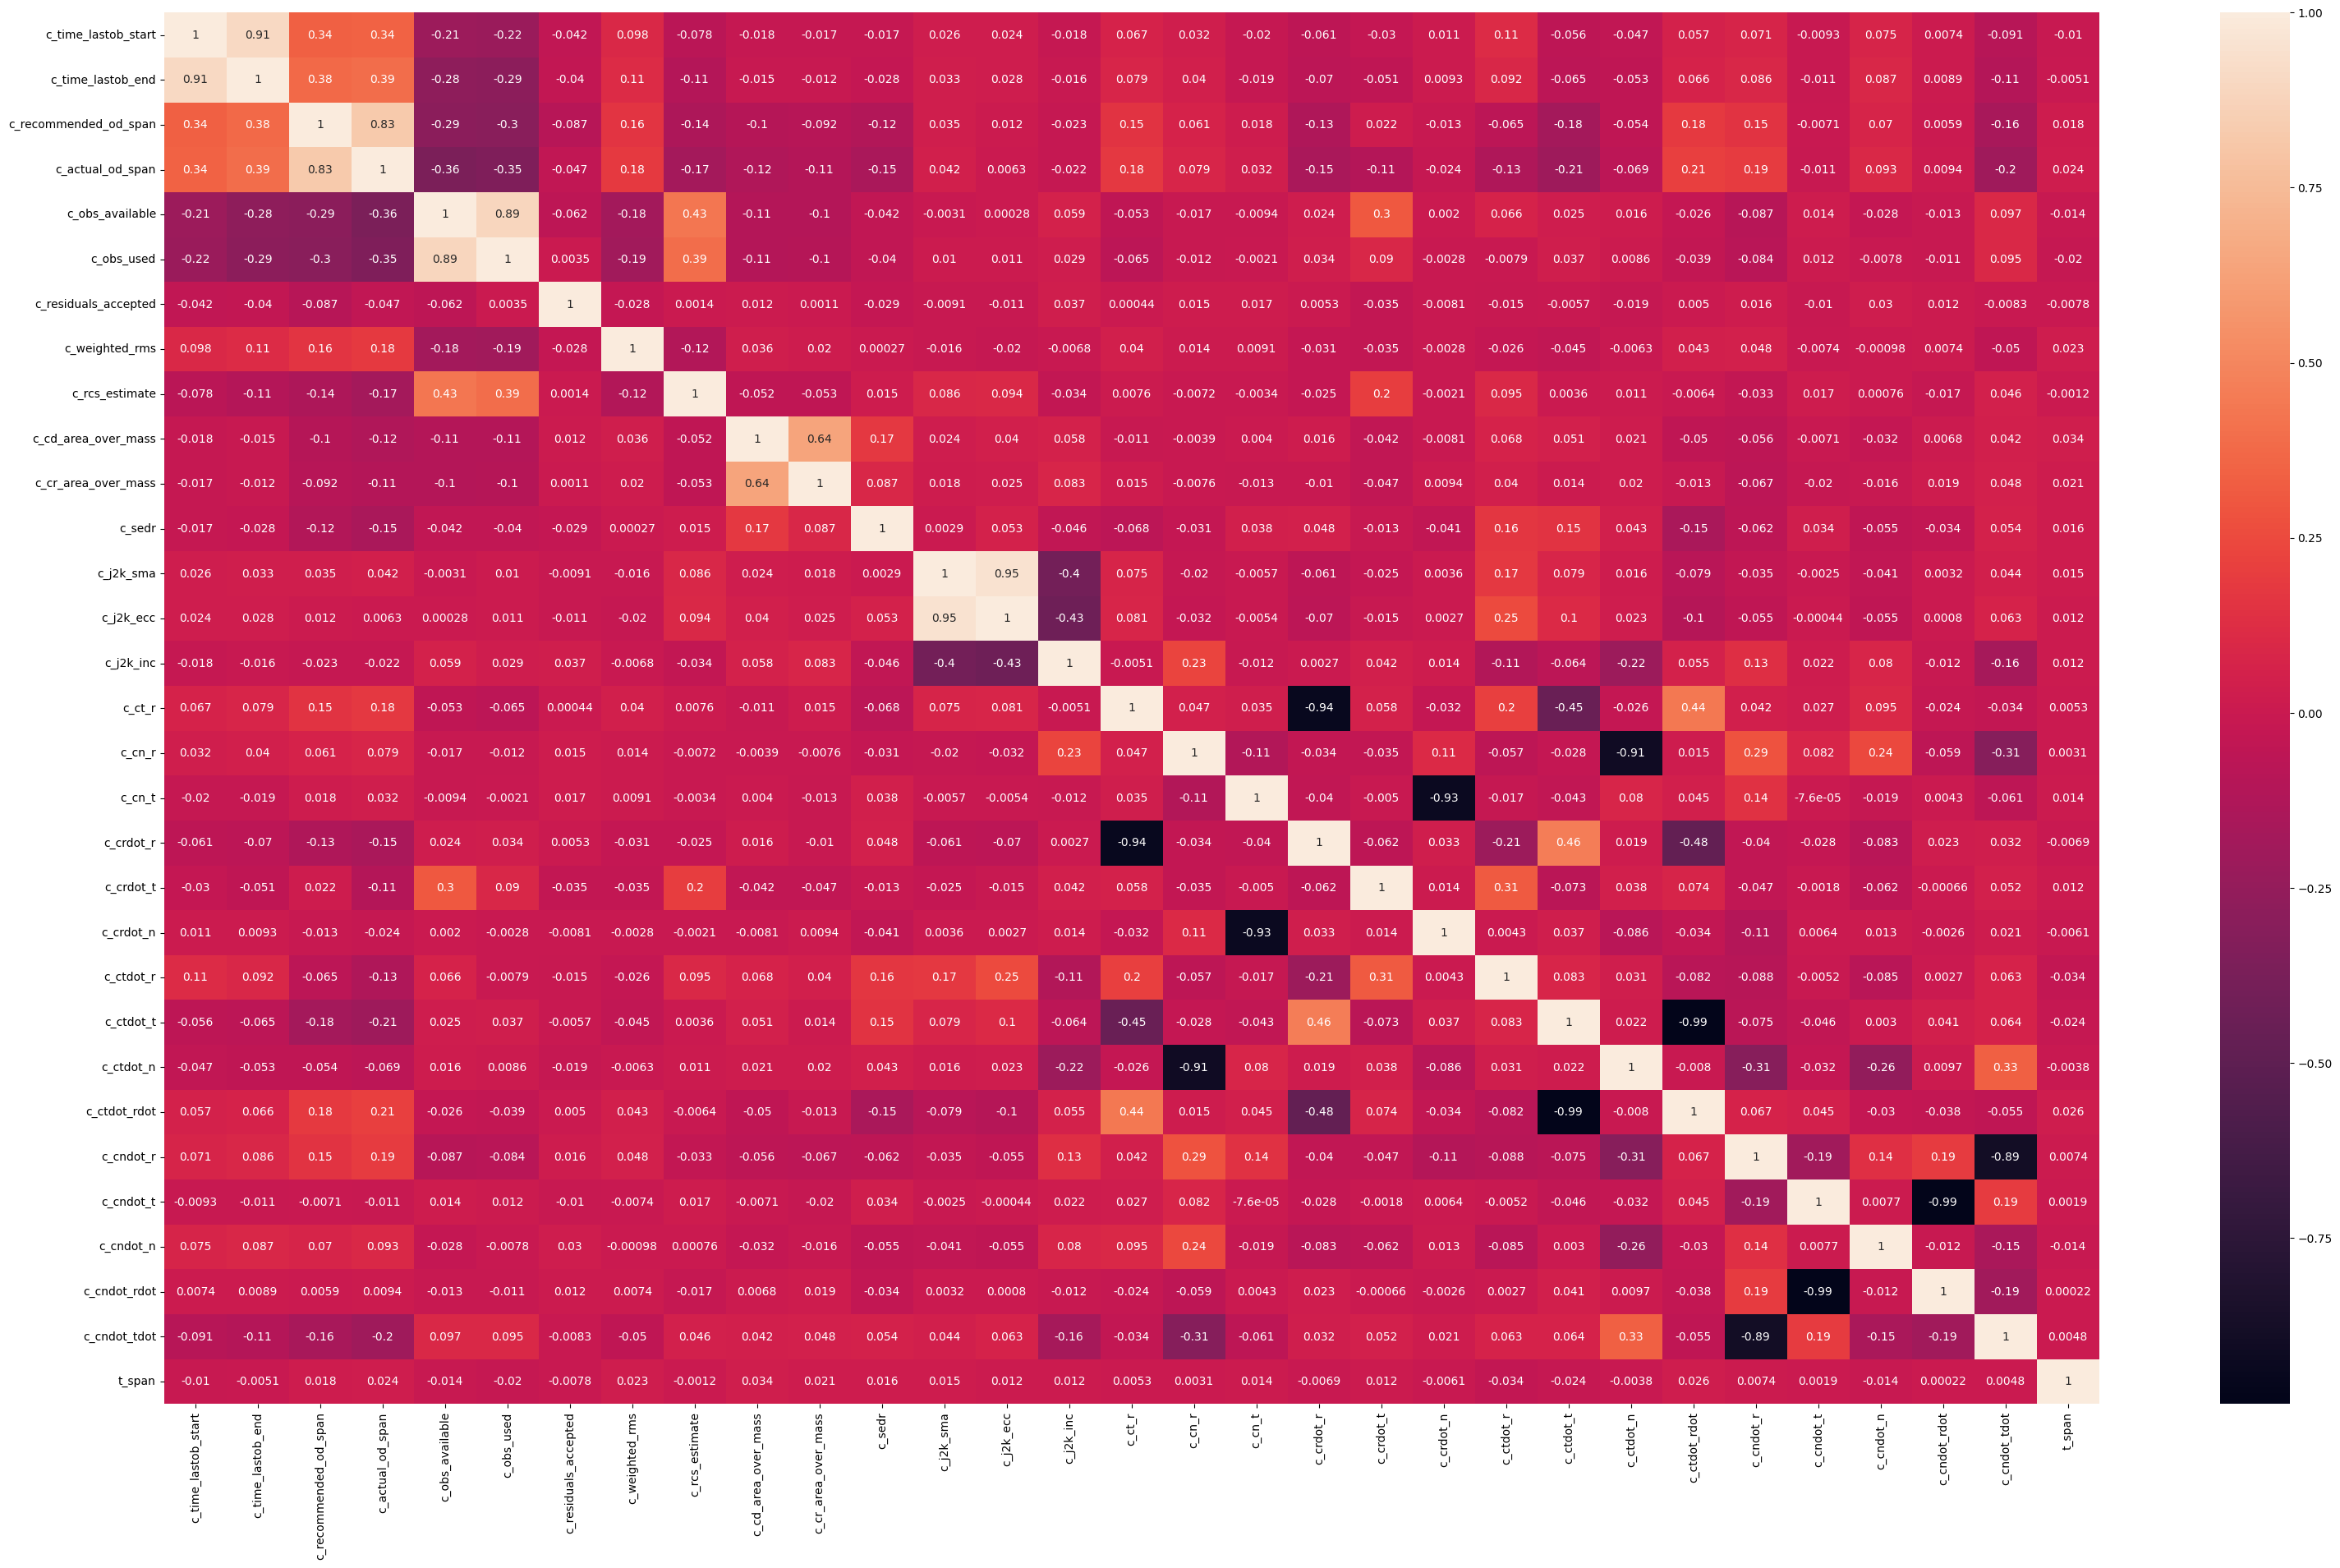

In [75]:
plt.figure(figsize=(38,22))
sns.heatmap(df_copy2.corr(), annot =True)

<AxesSubplot: title={'center': 'Correlation with risk'}>

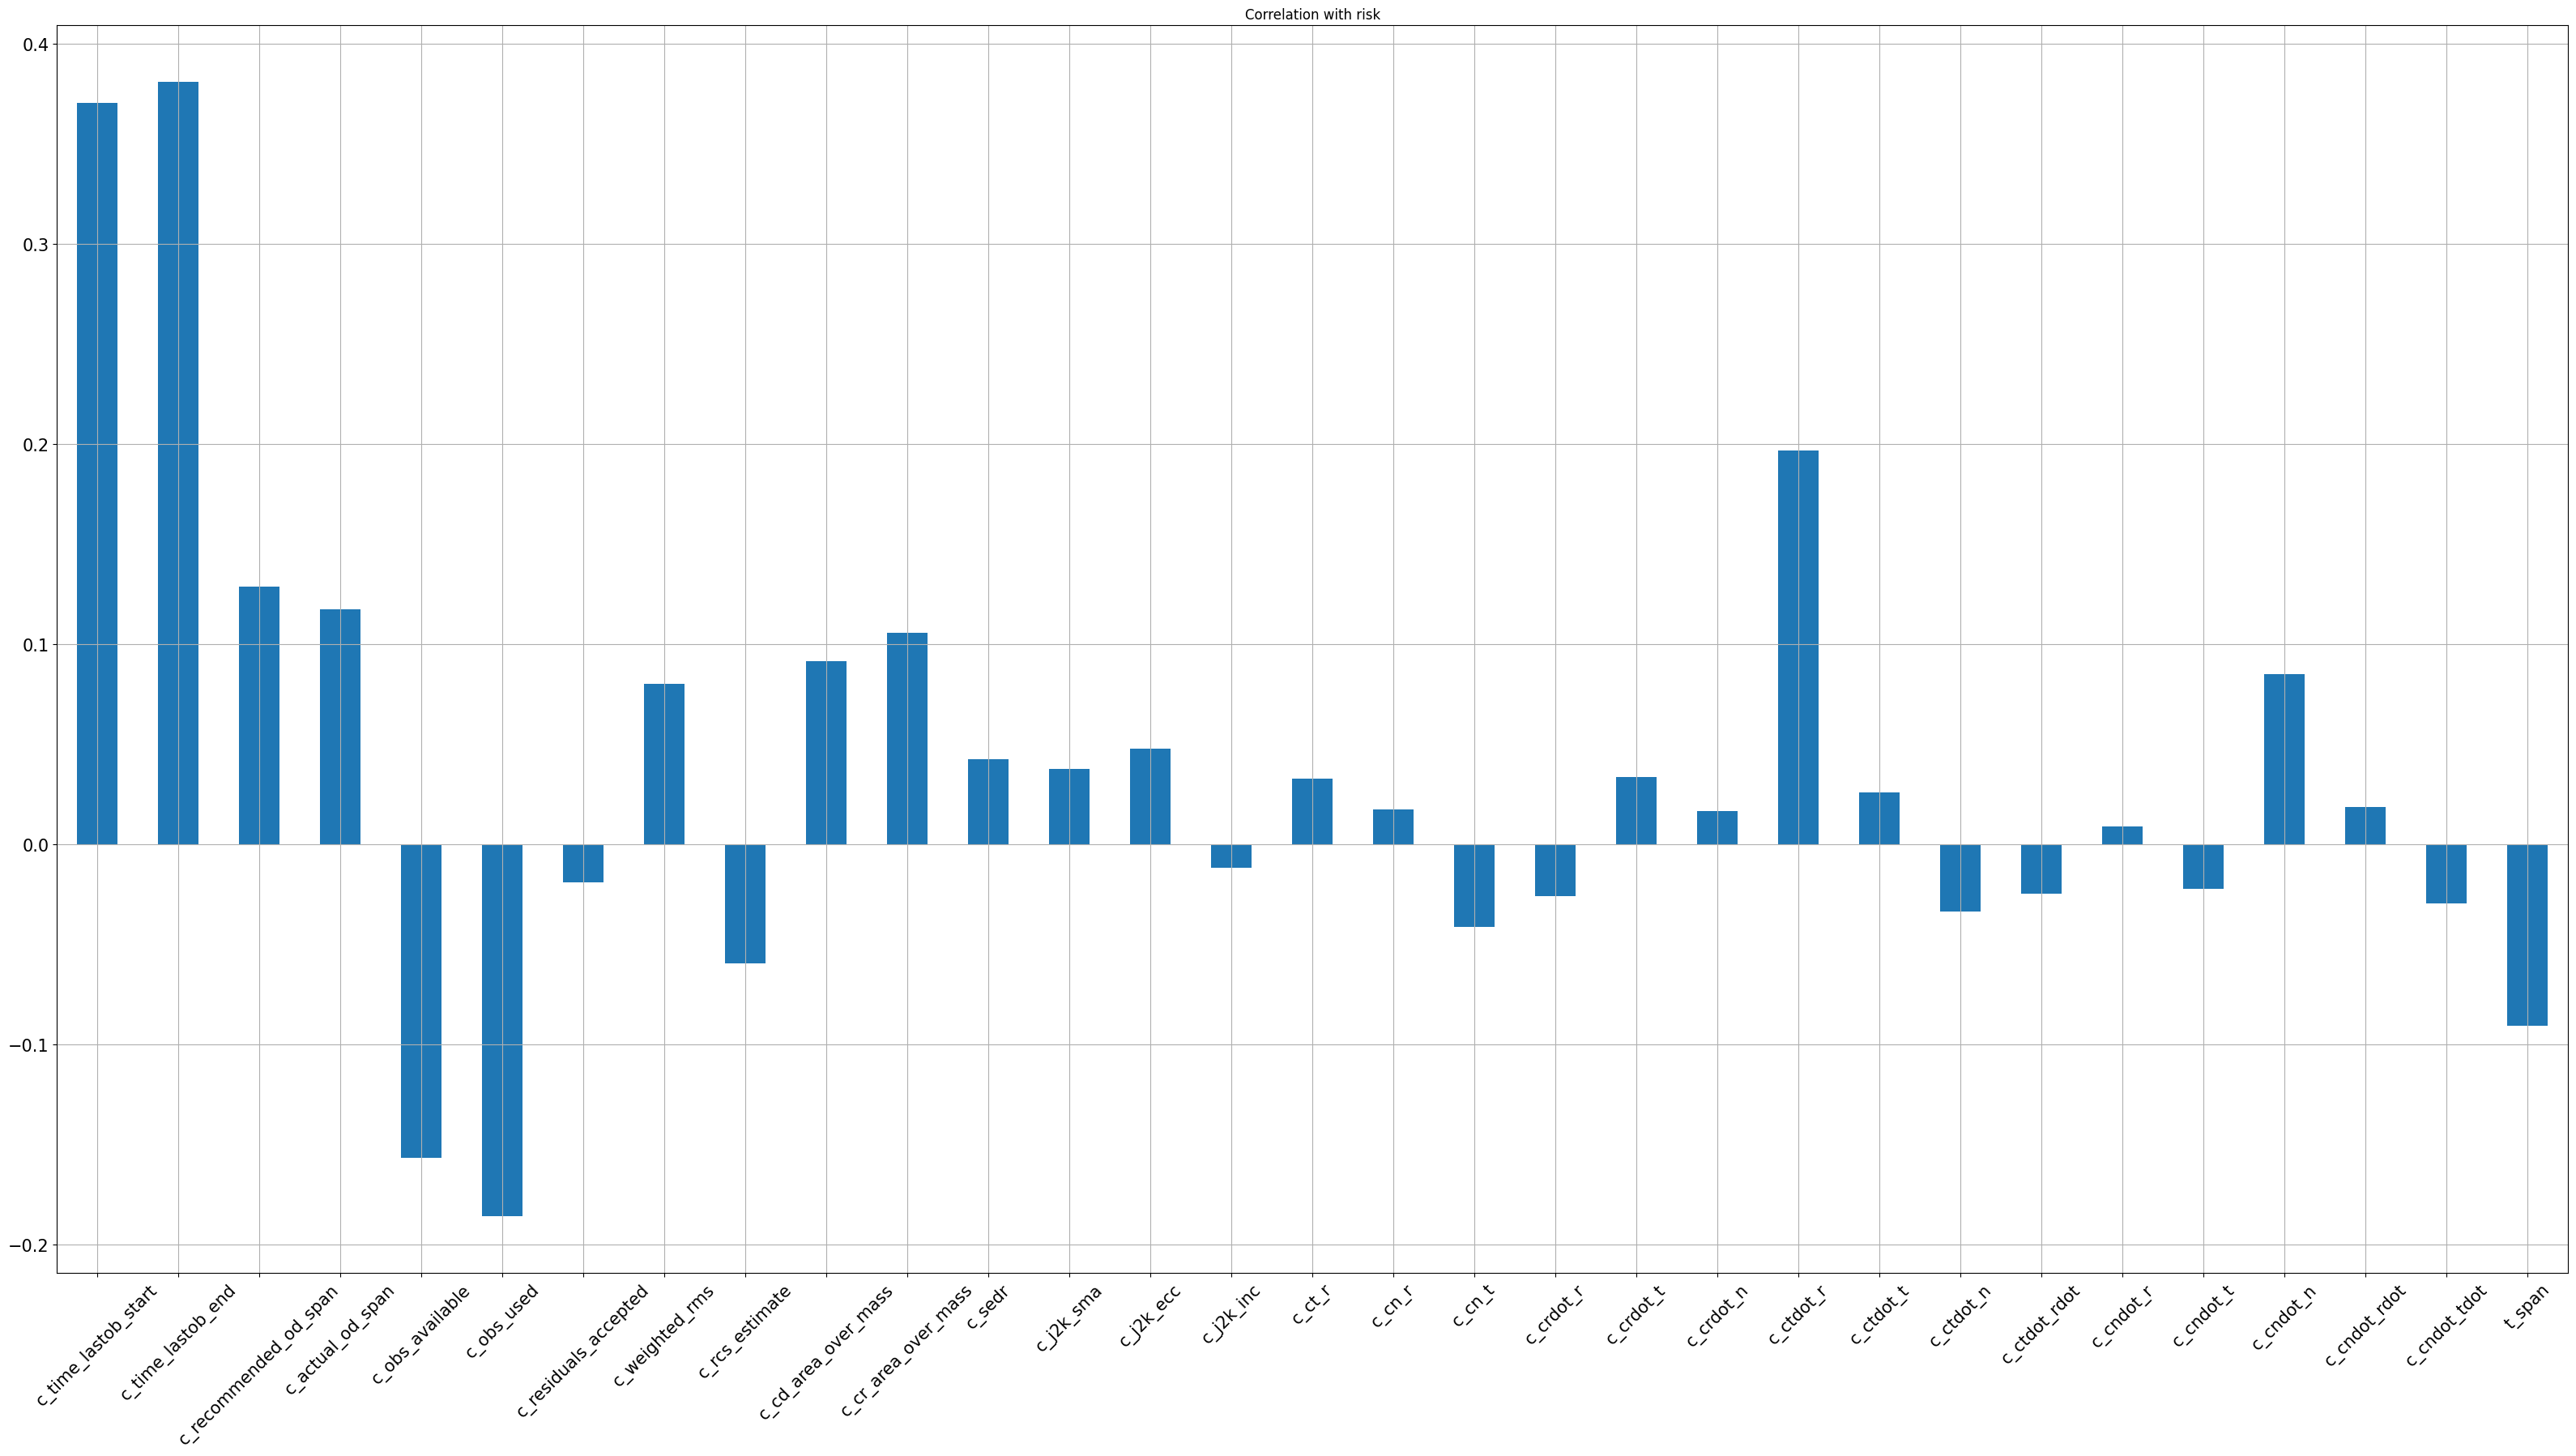

In [76]:
df_copy2.corrwith(df.risk).plot.bar(figsize=(40,20),title="Correlation with risk",fontsize=15,rot=45,grid=True)

In [77]:
#Select next 27 features
df_copy3 = X_train[['c_span', 't_h_apo', 't_h_per', 'c_h_apo', 'c_h_per', 'geocentric_latitude', 'azimuth', 'elevation', 'mahalanobis_distance', 't_position_covariance_det', 'c_position_covariance_det', 't_sigma_r', 'c_sigma_r', 't_sigma_t', 'c_sigma_t', 't_sigma_n', 'c_sigma_n', 't_sigma_rdot', 'c_sigma_rdot', 't_sigma_tdot', 'c_sigma_tdot', 't_sigma_ndot', 'c_sigma_ndot', 'F10', 'F3M', 'SSN', 'AP']]
df_copy3

,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
87601,2.0,631.218855,602.822773,621.413630,607.830366,47.634101,6.238531,0.082787,93.812462,1.073380e+06,...,0.079379,9.894241,0.004376,0.058701,0.003115,0.244284,68.0,72.0,0.0,8.0
121753,2.0,715.222204,695.358277,720.509079,629.586915,-72.448904,42.809241,-0.258554,239.837321,1.366037e+06,...,0.108878,5.800115,0.003009,0.061811,0.007406,0.216862,100.0,87.0,59.0,8.0
48454,2.0,794.257397,787.559080,802.763313,786.297673,80.308971,-64.200279,-0.165038,50.654829,9.054265e+07,...,0.139734,6.748518,0.012271,0.014090,0.009267,0.023690,70.0,71.0,13.0,2.0
73922,2.0,797.128847,761.296113,907.480718,730.191709,-68.453785,46.429853,-0.386339,96.705593,2.980427e+06,...,0.172125,23.278456,0.008233,0.561018,0.003460,0.911688,74.0,77.0,17.0,5.0
148484,2.0,443.099960,422.245664,451.246530,418.715065,40.937176,12.395090,0.131061,0.000370,5.901197e+08,...,1.545672,79053.661500,0.005787,79053.661500,0.002775,79053.661500,68.0,71.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,2.0,730.458008,678.711429,1136.124475,728.063025,-75.368195,-33.766052,0.084332,185.541744,6.809086e+05,...,0.033515,2.705191,0.005202,0.084989,0.007850,0.116095,70.0,69.0,0.0,2.0
65615,2.0,688.096596,680.104760,687.473171,681.716048,78.089937,13.014749,0.001175,32.870585,3.447153e+06,...,0.396941,25.674709,0.003230,0.043932,0.004449,0.046188,68.0,70.0,0.0,4.0
77655,2.0,646.056041,589.325403,705.520745,613.862358,-80.244543,-87.359617,-1.957720,12.500607,8.755641e+06,...,0.344926,18.074997,0.007855,0.092418,0.004099,0.237577,68.0,71.0,0.0,3.0
56088,2.0,638.557508,601.418061,1243.844235,513.550675,-65.603015,32.363339,1.329876,25.879494,2.858822e+05,...,0.052959,1.554494,0.005326,0.034235,0.004139,0.172042,119.0,108.0,103.0,10.0


<AxesSubplot: >

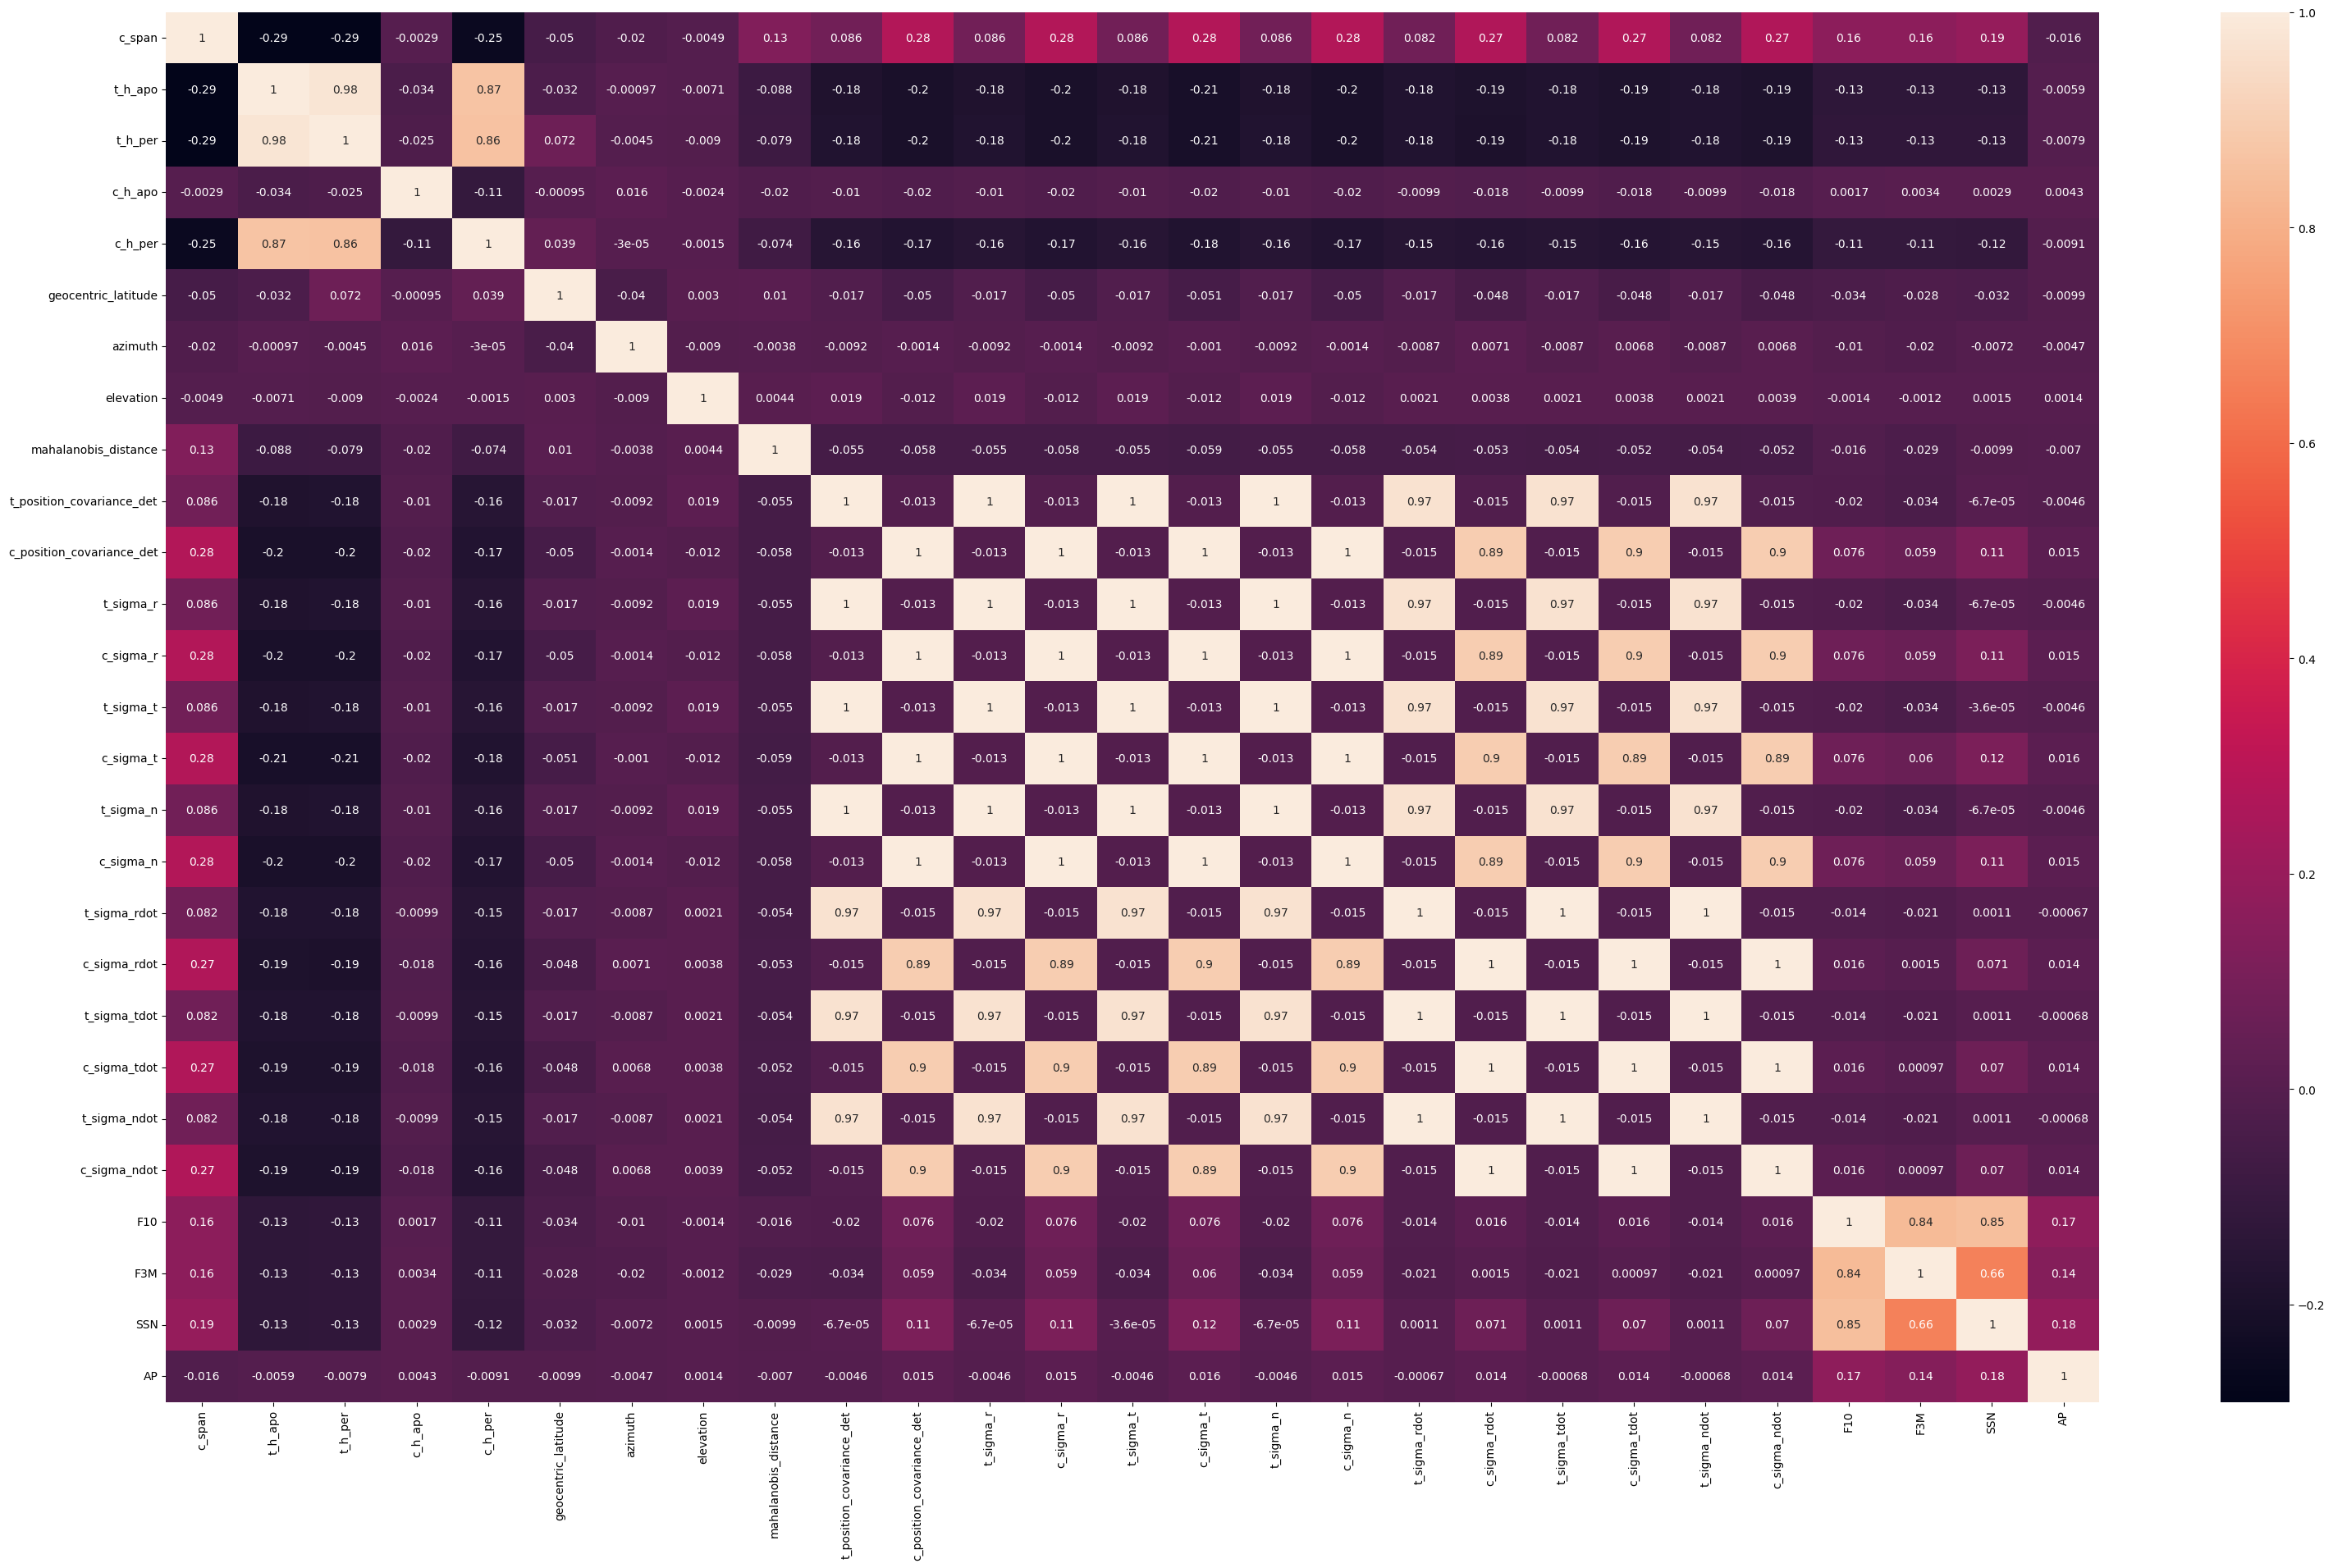

In [78]:
plt.figure(figsize=(38,22))
sns.heatmap(df_copy3.corr(), annot =True)

<AxesSubplot: title={'center': 'Correlation with risk'}>

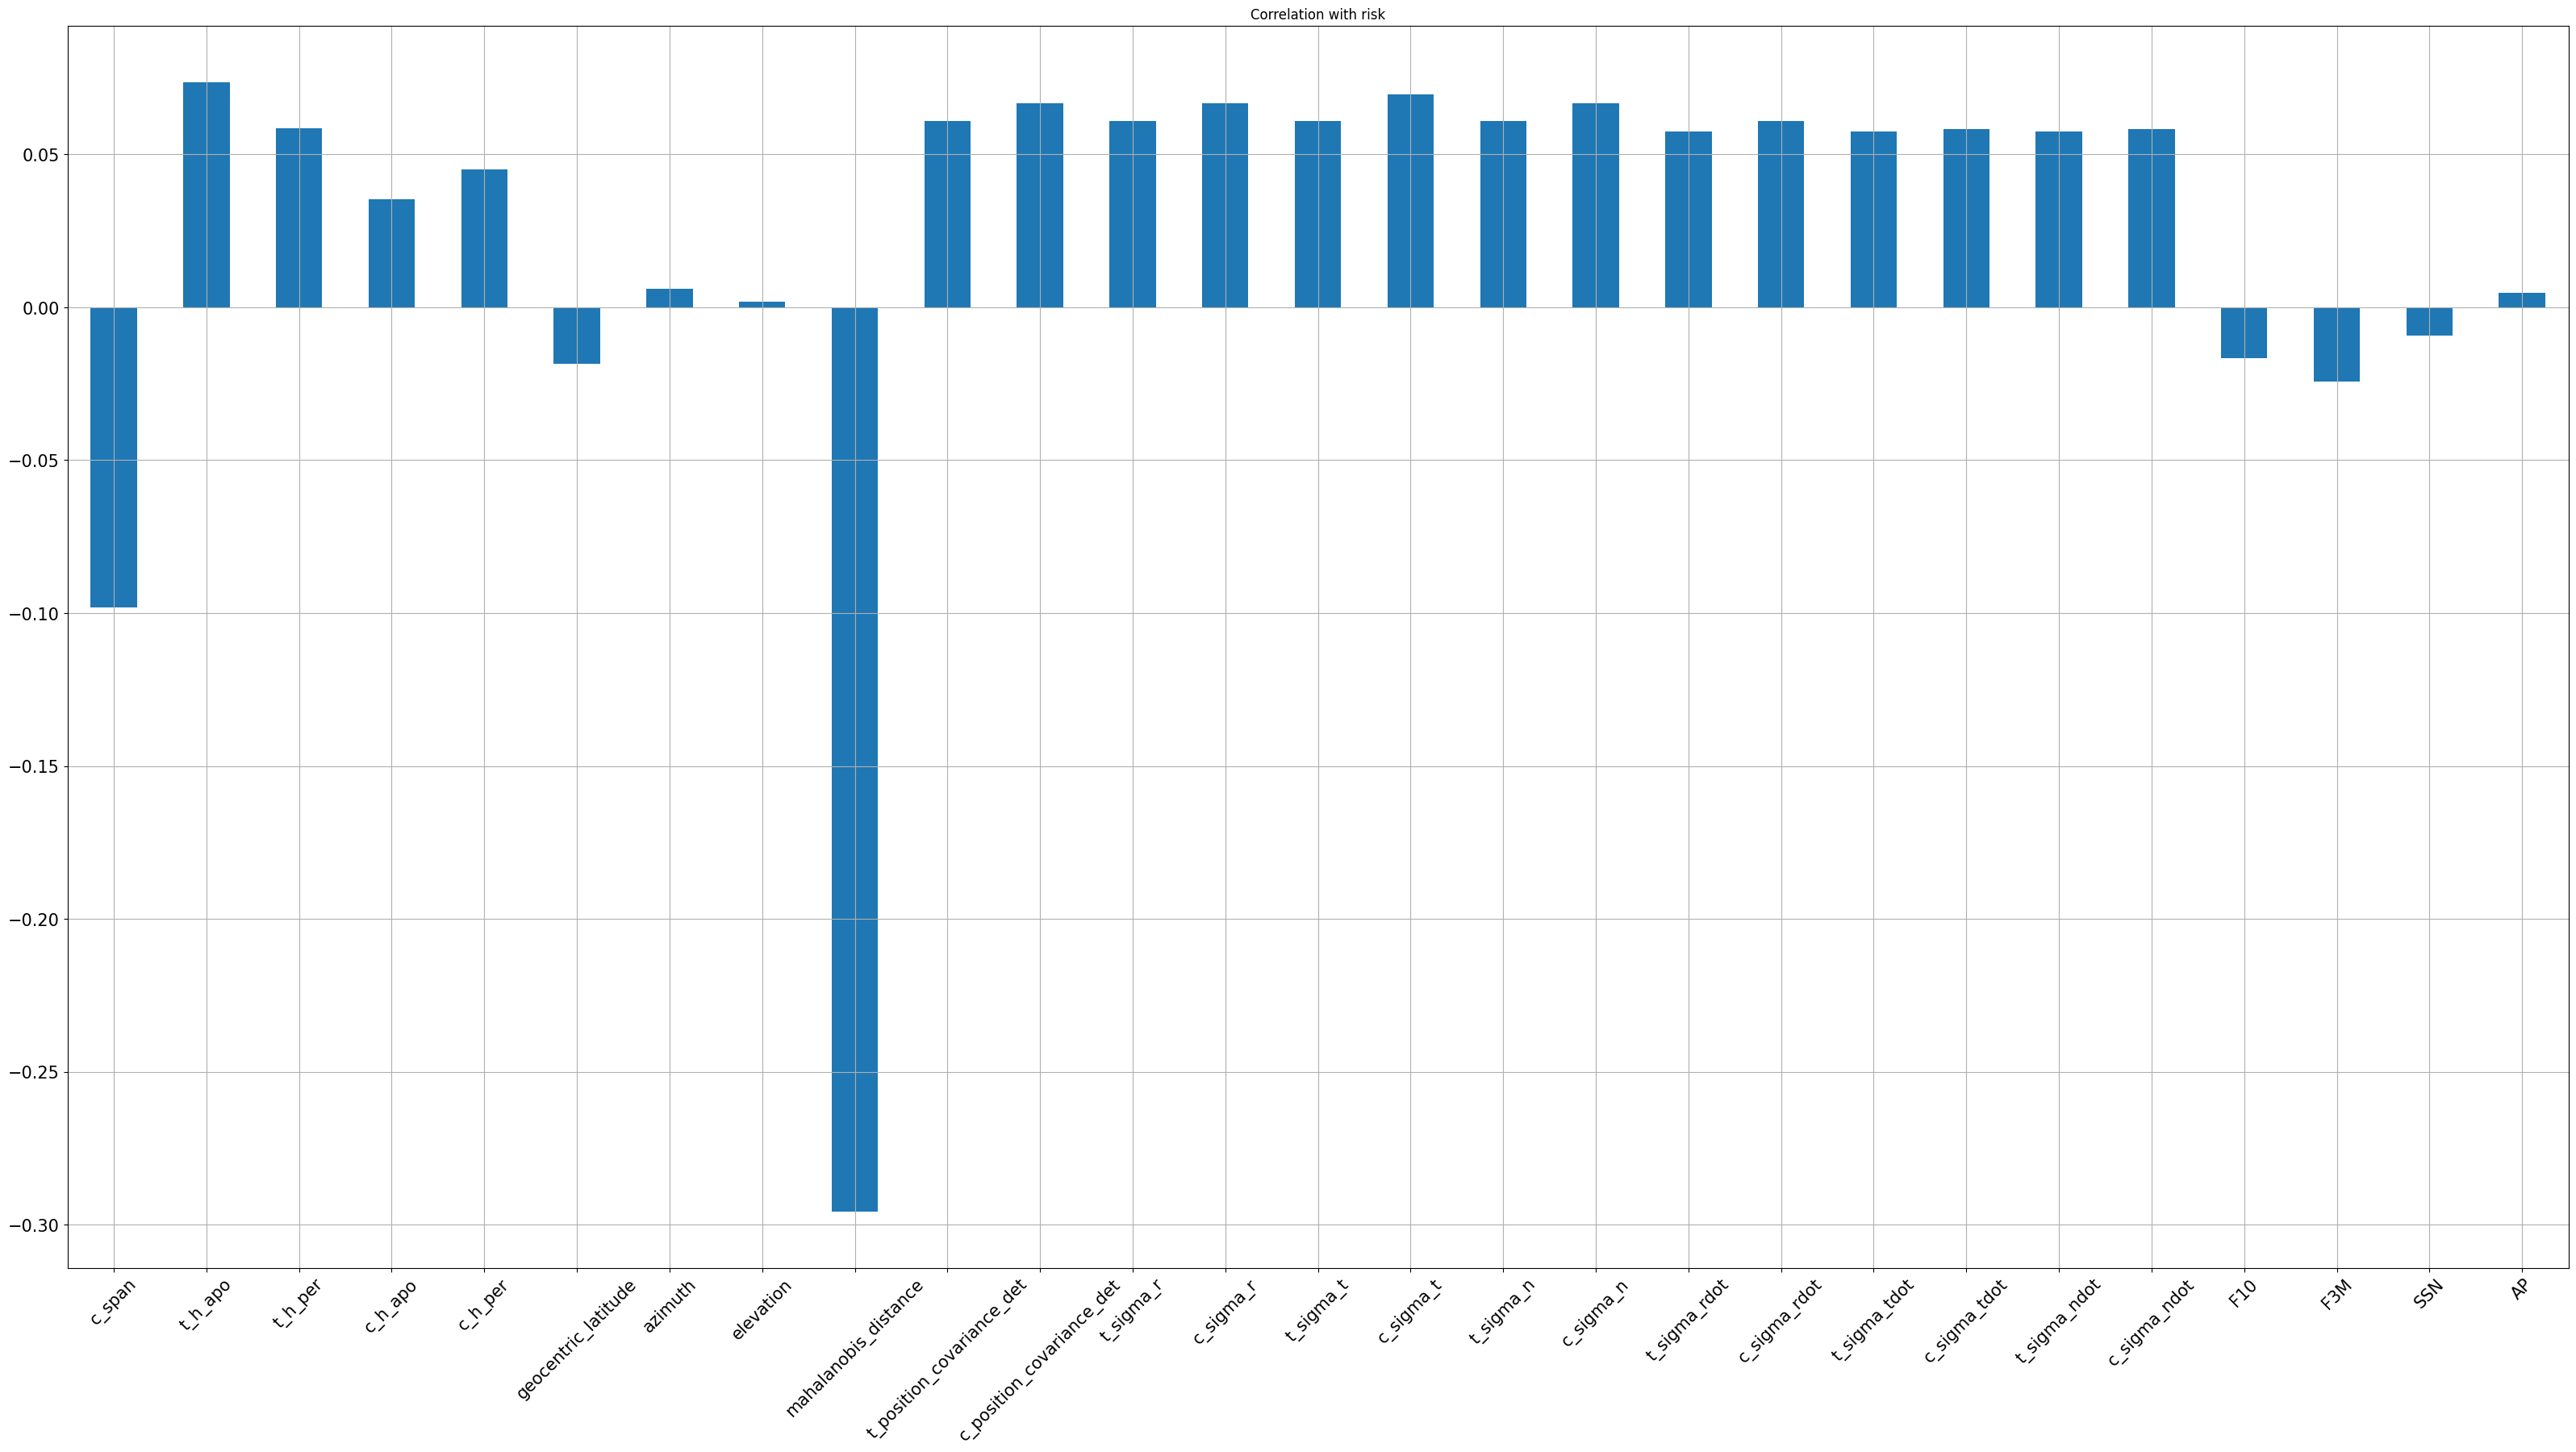

In [79]:
df_copy3.corrwith(df.risk).plot.bar(figsize=(40,20),title="Correlation with risk",fontsize=15,rot=45,grid=True)

Feature Importance concept

In [80]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.55514373, 0.16418951, 0.11463484, 0.38637866, 0.83527223,
       0.13659051, 0.49430221, 0.21039864, 0.16187016, 0.1783484 ,
       0.26496128, 0.57618756, 0.58232008, 0.00096614, 0.        ,
       0.10088585, 0.12122479, 0.13944272, 0.13516396, 0.0423884 ,
       0.10142787, 0.32659691, 0.2071768 , 0.18233982, 0.18835262,
       0.52067587, 0.38793874, 0.45044551, 0.08702446, 0.10827973,
       0.07655018, 0.08382844, 0.14971925, 0.07068462, 0.09125589,
       0.07993682, 0.1019203 , 0.08313763, 0.07948562, 0.06611513,
       0.09510132, 0.06827415, 0.0779639 , 0.08339211, 0.09653313,
       0.09466586, 0.43732894, 0.4583978 , 0.21153303, 0.19289975,
       0.12213516, 0.43000568, 0.19328487, 0.53967344, 0.45922459,
       0.42358787, 0.50229437, 0.40444566, 0.52247638, 0.27635177,
       0.38003368, 0.27631983, 0.2589571 , 0.21017162, 0.26371135,
       0.23709791, 0.23535186, 0.41496857, 0.23346779, 0.3490644 ,
       0.27420789, 0.41559859, 0.27295531, 0.40122987, 0.10373

In [81]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

max_risk_scaling        0.835272
azimuth                 0.645384
c_h_per                 0.609102
relative_velocity_n     0.582320
relative_velocity_t     0.576188
                          ...   
t_cndot_t               0.066115
AP                      0.045458
t_residuals_accepted    0.042388
t_time_lastob_start     0.000966
t_time_lastob_end       0.000000
Length: 102, dtype: float64

<AxesSubplot: >

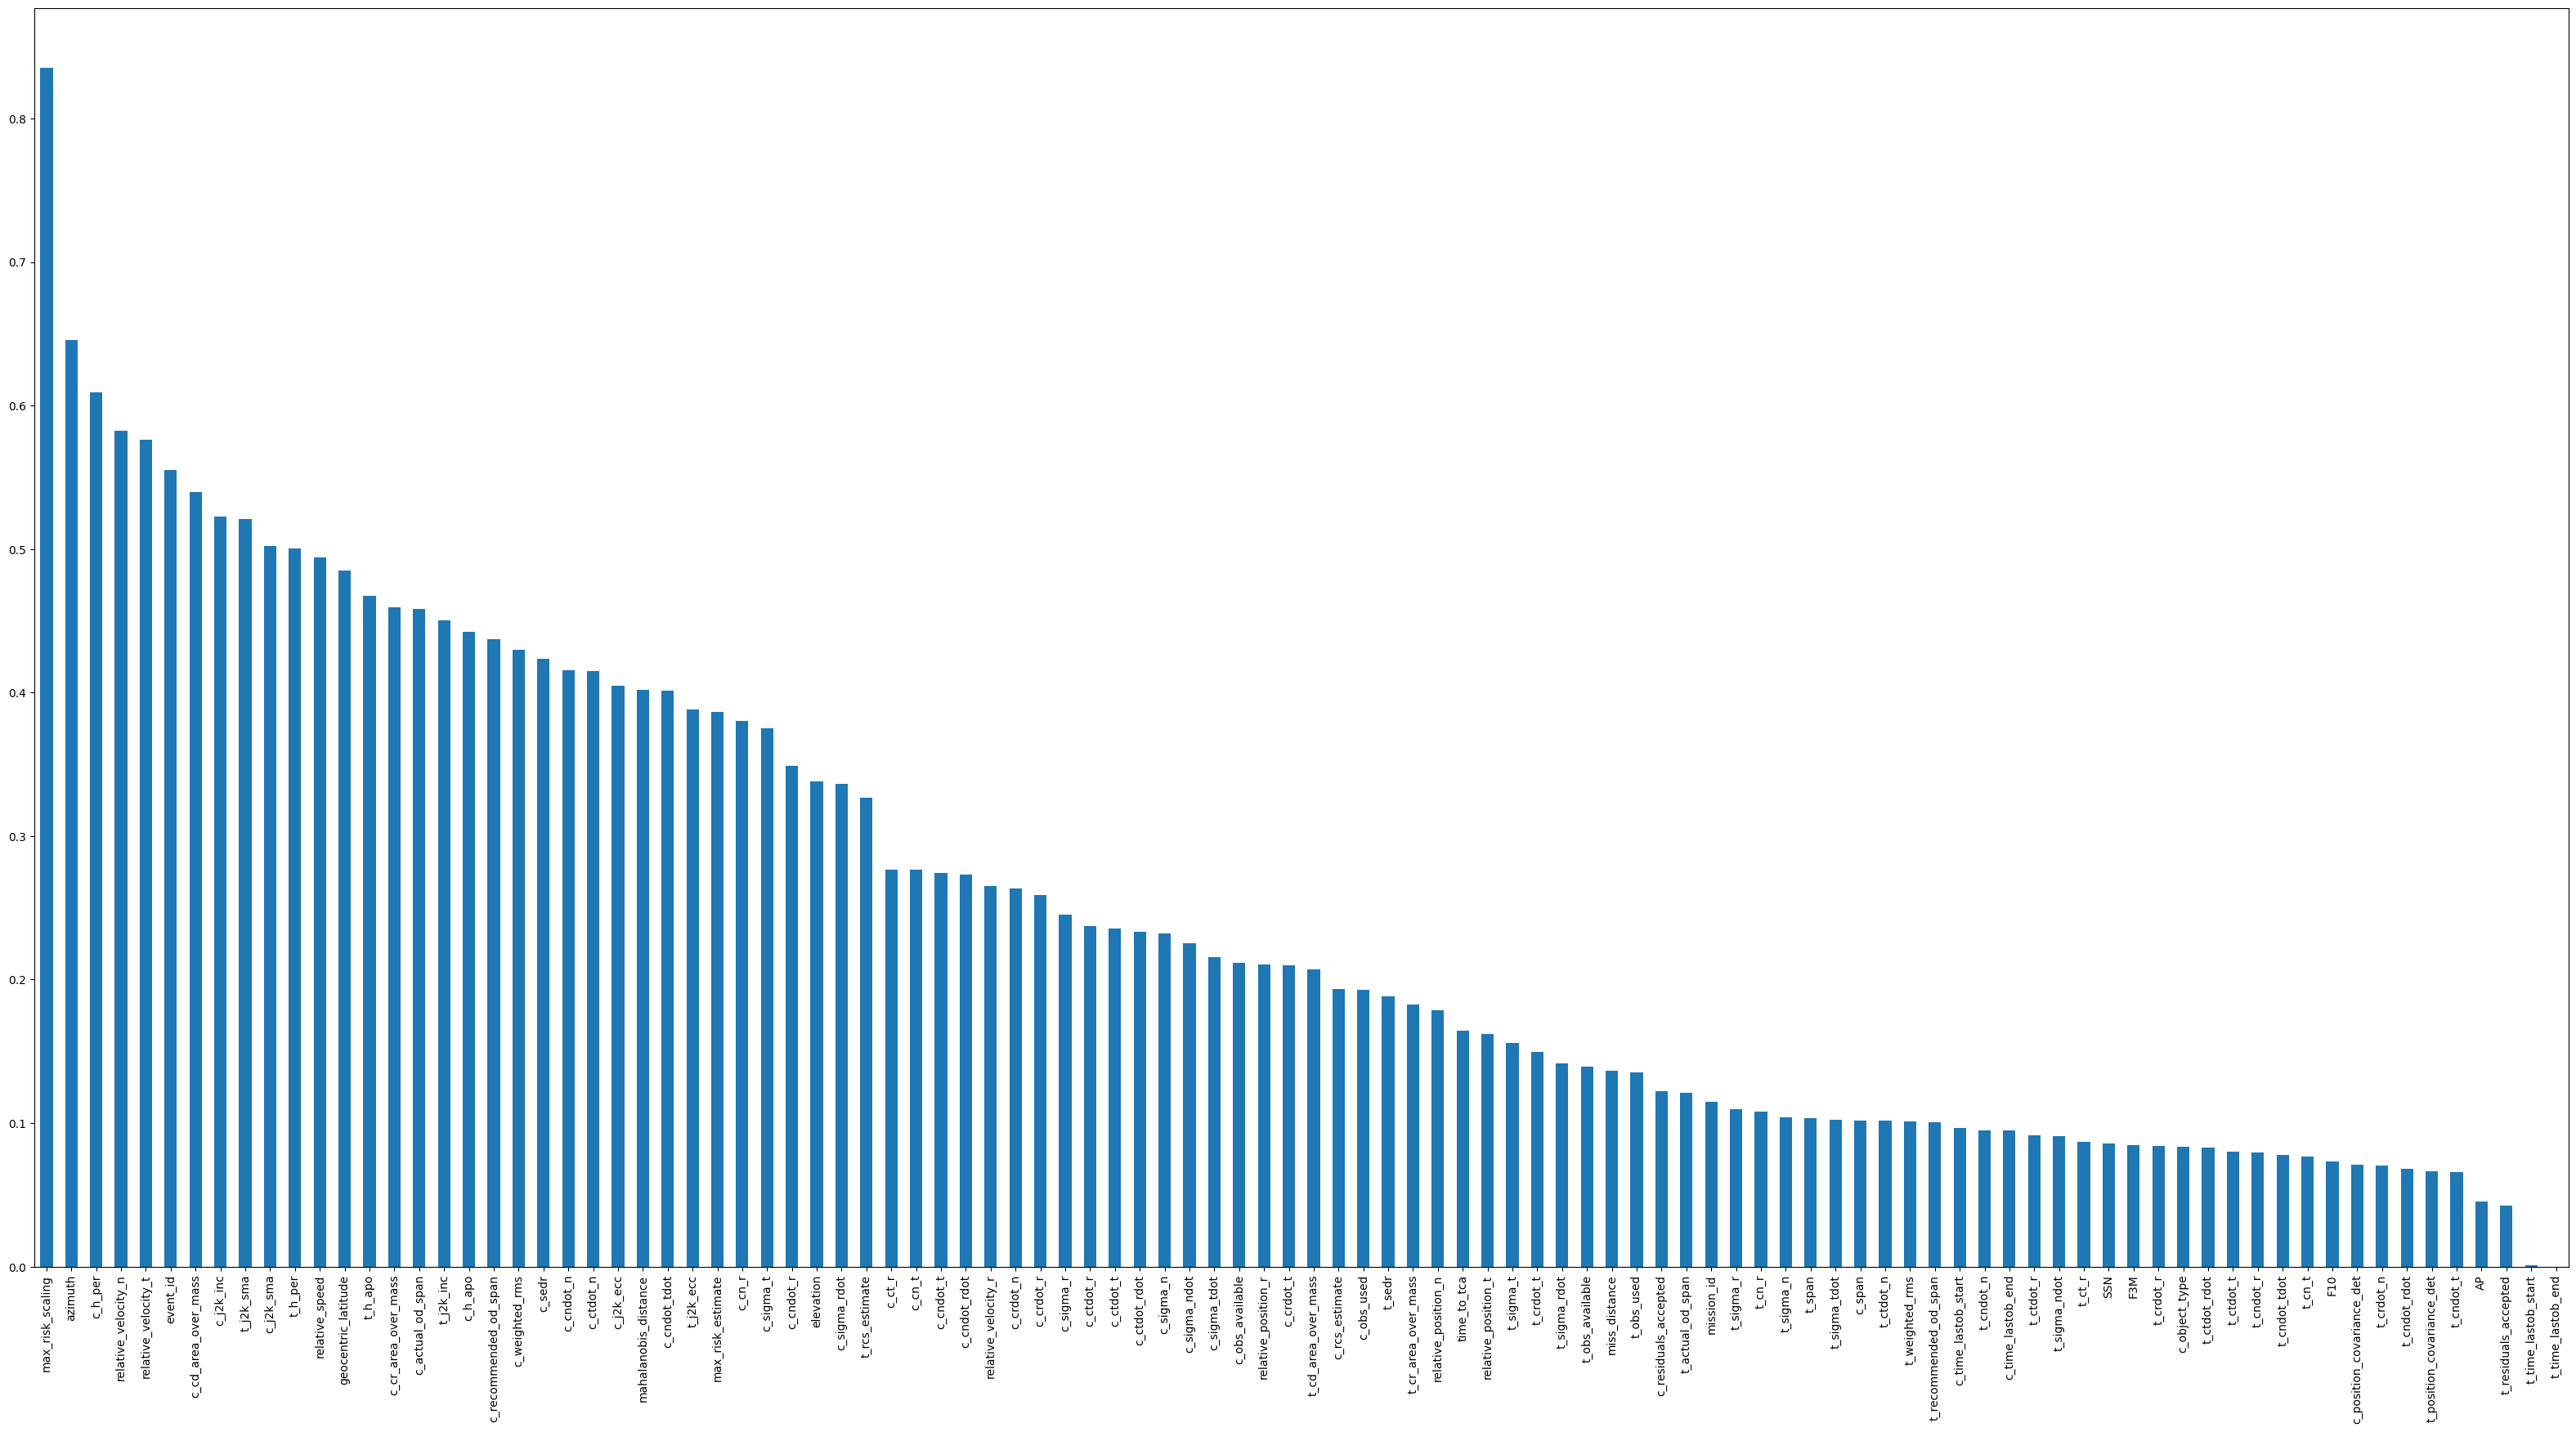

In [82]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(40,20))

In [83]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression,percentile=20)
selected_top_columns.fit(X_train,y_train)
new_X=X_train.columns[selected_top_columns.get_support()]
new_X
# model = SelectKBest(chi2,k=2)
# new = model.fit(X,y)


Index(['event_id', 'max_risk_scaling', 'relative_speed', 'relative_velocity_t',
       'relative_velocity_n', 't_j2k_sma', 't_j2k_inc',
       'c_recommended_od_span', 'c_actual_od_span', 'c_weighted_rms',
       'c_cd_area_over_mass', 'c_cr_area_over_mass', 'c_sedr', 'c_j2k_sma',
       'c_j2k_inc', 't_h_apo', 't_h_per', 'c_h_apo', 'c_h_per',
       'geocentric_latitude', 'azimuth'],
      dtype='object')

In [84]:
df_copy_new = df[new_X]
df_copy_new

,event_id,max_risk_scaling,relative_speed,relative_velocity_t,relative_velocity_n,t_j2k_sma,t_j2k_inc,c_recommended_od_span,c_actual_od_span,c_weighted_rms,...,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_inc,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth
0,0,8.602101,13792,-12637.0,-5525.9,6996.918867,97.806412,15.85,15.85,2.360,...,0.126607,0.001406,7006.607320,74.045735,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769
1,0,8.956374,13792,-12637.0,-5525.9,6996.920255,97.806420,15.85,15.85,2.360,...,0.126607,0.001406,7006.621053,74.045736,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769
2,0,8.932195,13792,-12637.0,-5525.9,6996.920553,97.806418,15.85,15.85,2.360,...,0.126607,0.001406,7006.623524,74.045737,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769
3,0,8.913444,13792,-12637.0,-5525.9,6996.920276,97.806423,15.85,15.85,2.360,...,0.126607,0.001406,7006.622932,74.045736,646.747747,590.818806,650.515635,606.456229,-73.571021,-23.618769
4,0,9.036838,13792,-12637.0,-5525.9,6996.920446,97.806426,15.85,15.85,2.360,...,0.126607,0.001406,7006.626646,74.045736,646.745868,590.821024,650.519613,606.459678,-73.570409,-23.618769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,13153,7.561579,14976,-14937.0,1082.7,7067.383415,98.103051,28.89,28.89,1.888,...,0.271941,0.000998,7115.923023,86.483781,703.835613,674.657217,773.069958,702.502088,-55.780625,4.145802
162630,13153,7.471857,14976,-14937.0,1082.7,7067.382735,98.103042,28.89,28.89,1.888,...,0.271941,0.000998,7115.919459,86.483780,703.831301,674.660168,773.065324,702.499593,-55.783617,4.145802
162631,13153,7.463470,14976,-14937.0,1082.7,7067.383054,98.103046,28.89,28.89,1.888,...,0.271941,0.000998,7115.920699,86.483780,703.831938,674.660170,773.066604,702.500793,-55.783325,4.145802
162632,13153,7.378397,14976,-14937.0,1082.7,7067.383240,98.103041,28.89,28.89,1.888,...,0.271941,0.000998,7115.921263,86.483780,703.828530,674.663949,773.067633,702.500893,-55.783425,4.145802


In [85]:
print(np.any(np.isnan(df[new_X])))

True


In [86]:
print(df[new_X].isnull().sum())

event_id                  0
max_risk_scaling          0
relative_speed            0
relative_velocity_t       0
relative_velocity_n       0
t_j2k_sma                 0
t_j2k_inc                 0
c_recommended_od_span    11
c_actual_od_span         11
c_weighted_rms           11
c_cd_area_over_mass       0
c_cr_area_over_mass       0
c_sedr                    0
c_j2k_sma                 0
c_j2k_inc                 0
t_h_apo                   0
t_h_per                   0
c_h_apo                   0
c_h_per                   0
geocentric_latitude       0
azimuth                   0
dtype: int64


In [87]:
new_X = df_copy_new.interpolate(limit_direction='both')
new_X

,event_id,max_risk_scaling,relative_speed,relative_velocity_t,relative_velocity_n,t_j2k_sma,t_j2k_inc,c_recommended_od_span,c_actual_od_span,c_weighted_rms,...,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_inc,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth
0,0,8.602101,13792,-12637.0,-5525.9,6996.918867,97.806412,15.85,15.85,2.360,...,0.126607,0.001406,7006.607320,74.045735,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769
1,0,8.956374,13792,-12637.0,-5525.9,6996.920255,97.806420,15.85,15.85,2.360,...,0.126607,0.001406,7006.621053,74.045736,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769
2,0,8.932195,13792,-12637.0,-5525.9,6996.920553,97.806418,15.85,15.85,2.360,...,0.126607,0.001406,7006.623524,74.045737,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769
3,0,8.913444,13792,-12637.0,-5525.9,6996.920276,97.806423,15.85,15.85,2.360,...,0.126607,0.001406,7006.622932,74.045736,646.747747,590.818806,650.515635,606.456229,-73.571021,-23.618769
4,0,9.036838,13792,-12637.0,-5525.9,6996.920446,97.806426,15.85,15.85,2.360,...,0.126607,0.001406,7006.626646,74.045736,646.745868,590.821024,650.519613,606.459678,-73.570409,-23.618769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,13153,7.561579,14976,-14937.0,1082.7,7067.383415,98.103051,28.89,28.89,1.888,...,0.271941,0.000998,7115.923023,86.483781,703.835613,674.657217,773.069958,702.502088,-55.780625,4.145802
162630,13153,7.471857,14976,-14937.0,1082.7,7067.382735,98.103042,28.89,28.89,1.888,...,0.271941,0.000998,7115.919459,86.483780,703.831301,674.660168,773.065324,702.499593,-55.783617,4.145802
162631,13153,7.463470,14976,-14937.0,1082.7,7067.383054,98.103046,28.89,28.89,1.888,...,0.271941,0.000998,7115.920699,86.483780,703.831938,674.660170,773.066604,702.500793,-55.783325,4.145802
162632,13153,7.378397,14976,-14937.0,1082.7,7067.383240,98.103041,28.89,28.89,1.888,...,0.271941,0.000998,7115.921263,86.483780,703.828530,674.663949,773.067633,702.500893,-55.783425,4.145802


In [88]:
print(np.any(np.isnan(new_X)))

False


In [89]:
new_y = df.risk
new_y

0        -10.204955
1        -10.355758
2        -10.345631
3        -10.337809
4        -10.391260
            ...    
162629    -7.108630
162630    -7.070070
162631    -7.066209
162632    -7.028307
162633    -7.172372
Name: risk, Length: 162634, dtype: float64

In [90]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=100)

In [91]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor_rf.fit(new_X_train,new_y_train)

RandomForestRegressor(random_state=0)

In [92]:
accuracy_rf = regressor_rf.score(new_X_test,new_y_test)
accuracy_rf

0.9987831900140112

In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# from sklearn import metrics
from sklearn.metrics import confusion_matrix  
predR_rf = regressor_rf.predict(new_X_test)
rmseR_rf = np.sqrt(mean_squared_error(new_y_test, predR_rf))
mseR_rf=mean_squared_error(new_y_test,predR_rf)
maeR_rf=mean_absolute_error(new_y_test,predR_rf)
r2R_rf=r2_score(new_y_test,predR_rf)
result1=[rmseR_rf,mseR_rf,maeR_rf,r2R_rf]
df_R_rf = pd.DataFrame({'RandomForestRegressor':result1},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_rf 

,RandomForestRegressor
RMSE:,0.349217
MSE:,0.121952
MAE:,0.157226
R2-score:,0.998783


In [94]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(new_X_train,new_y_train)

LinearRegression()

In [95]:
accuracy_lr = regressor_lr.score(new_X_test,new_y_test)
accuracy_lr

0.050939194738736204

In [96]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_lr = regressor_lr.predict(new_X_test)
rmseR_lr = np.sqrt(mean_squared_error(new_y_test, predR_lr))
mseR_lr=mean_squared_error(new_y_test,predR_lr)
maeR_lr=mean_absolute_error(new_y_test,predR_lr)
r2R_lr=r2_score(new_y_test,predR_lr)
result2=[rmseR_lr,mseR_lr,maeR_lr,r2R_lr]
df_R_lr = pd.DataFrame({'Linear Regression':result2},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_lr 

,Linear Regression
RMSE:,9.752825
MSE:,95.117589
MAE:,9.111923
R2-score:,0.050939


In [97]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
regressor_rr = Ridge(alpha=0.5)

regressor_rr.fit(new_X_train,new_y_train)

c:\Users\Aneri Thakkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.93601e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.5)

In [98]:
accuracy_rr = regressor_rr.score(new_X_test,new_y_test)
accuracy_rr

0.05091728656339978

In [99]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_rr = regressor_rr.predict(new_X_test)
rmseR_rr = np.sqrt(mean_squared_error(new_y_test, predR_rr))
mseR_rr=mean_squared_error(new_y_test,predR_rr)
maeR_rr=mean_absolute_error(new_y_test,predR_rr)
r2R_rr=r2_score(new_y_test,predR_rr)
result4=[rmseR_rr,mseR_rr,maeR_rr,r2R_rr]
df_R_rr = pd.DataFrame({'Ridge Regression':result4},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_rr

,Ridge Regression
RMSE:,9.752937
MSE:,95.119785
MAE:,9.112084
R2-score:,0.050917


In [100]:
regressor_ls = Lasso(alpha=0.25)

regressor_ls.fit(new_X_train,new_y_train)

c:\Users\Aneri Thakkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+06, tolerance: 9.781e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.25)

In [101]:
accuracy_ls = regressor_ls.score(new_X_test,new_y_test)
accuracy_ls

0.04766815314232509

In [102]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_ls = regressor_ls.predict(new_X_test)
rmseR_ls = np.sqrt(mean_squared_error(new_y_test, predR_ls))
mseR_ls=mean_squared_error(new_y_test,predR_ls)
maeR_ls=mean_absolute_error(new_y_test,predR_ls)
r2R_ls=r2_score(new_y_test,predR_ls)
result5=[rmseR_ls,mseR_ls,maeR_ls,r2R_ls]
df_R_ls = pd.DataFrame({'lasso Regression':result5},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_ls

,lasso Regression
RMSE:,9.769617
MSE:,95.445422
MAE:,9.146731
R2-score:,0.047668


In [103]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
regressor_rr = Ridge(alpha=0.5)

regressor_rr.fit(new_X_train,new_y_train)

#train and test scorefor ridge regression
# train_score_ridge = regression_ridgeReg.score(X_train, y_train)
# test_score_ridge = regression_ridgeReg.score(X_test, y_test)

c:\Users\Aneri Thakkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.93601e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.5)

In [104]:
accuracy_rr = regressor_rr.score(new_X_test,new_y_test)
accuracy_rr

0.05091728656339978

In [105]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_rr = regressor_rr.predict(new_X_test)
rmseR_rr = np.sqrt(mean_squared_error(new_y_test, predR_rr))
mseR_rr=mean_squared_error(new_y_test,predR_rr)
maeR_rr=mean_absolute_error(new_y_test,predR_rr)
r2R_rr=r2_score(new_y_test,predR_rr)
result4=[rmseR_rr,mseR_rr,maeR_rr,r2R_rr]
df_R_rr = pd.DataFrame({'Ridge Regression':result4},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_rr

,Ridge Regression
RMSE:,9.752937
MSE:,95.119785
MAE:,9.112084
R2-score:,0.050917


In [106]:
regressor_ls = Lasso(alpha=0.25)

regressor_ls.fit(new_X_train,new_y_train)

c:\Users\Aneri Thakkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+06, tolerance: 9.781e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.25)

In [107]:
accuracy_ls = regressor_ls.score(new_X_test,new_y_test)
accuracy_ls

0.04766815314232509

In [108]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_ls = regressor_ls.predict(new_X_test)
rmseR_ls = np.sqrt(mean_squared_error(new_y_test, predR_ls))
mseR_ls=mean_squared_error(new_y_test,predR_ls)
maeR_ls=mean_absolute_error(new_y_test,predR_ls)
r2R_ls=r2_score(new_y_test,predR_ls)
result5=[rmseR_ls,mseR_ls,maeR_ls,r2R_ls]
df_R_ls = pd.DataFrame({'lasso Regression':result5},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_ls

,lasso Regression
RMSE:,9.769617
MSE:,95.445422
MAE:,9.146731
R2-score:,0.047668


In [109]:
result = pd.DataFrame({'RandomForestRegressor':result1,'Linear Regression':result2,'Ridge Regression':result4,'Lasso Regression':result5},index=['RMSE:','MSE:','MAE:','R2-score:'])
result

,RandomForestRegressor,Linear Regression,Ridge Regression,Lasso Regression
RMSE:,0.349217,9.752825,9.752937,9.769617
MSE:,0.121952,95.117589,95.119785,95.445422
MAE:,0.157226,9.111923,9.112084,9.146731
R2-score:,0.998783,0.050939,0.050917,0.047668


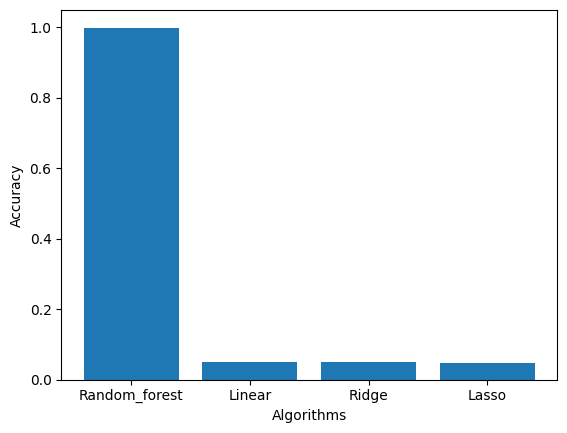

In [114]:
x_lst = ['Random_forest','Linear','Ridge','Lasso',]
r2_score_lst =[]
r2_score_lst.append(accuracy_rf)
r2_score_lst.append(accuracy_lr)
r2_score_lst.append(accuracy_rr)
r2_score_lst.append(accuracy_ls)

plt.bar(x_lst, r2_score_lst)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()
